# EXECUTIVE SUMMARY

1. Optimum Machine Model Chosen: 
2. Accuracy Score: 
3. Cross Validation Score: 
4. Final Accuracy Score(After Hyperparamter Tunning): 
5. RMSE:
6. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing(Univariate,Bivariate,Multivariate), Metrics Measurement, Model Execution and Hyperparameter Tunning

# PROJECT CONTENTS
- Problem Statement
- Domain Knowledge
- Step 1: Attributes of Variables
- Step 2: LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
     - 2.1:Import all necessary libraries
     - 2.2:Load Dataset
     - 2.3:Descriptive Analysis
     - 2.4:Observations
- Step 3: Exploratory Data Analysis
     - 3.1:Encoding
     - 3.2:Normal Distribution Check(Univariate Analysis)
     - 3.3:Scatter Plot Check(Bivariate Analysis)
     - 3.4:Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis
     - 3.5:Outlier Check
     - 3.6:Skewness Check
     - 3.7:Categorical Variable(s) Check
- Step 4: DATA PREPROCESSING
     - 4.1:Removal of Duplicates
     - 4.2:Dropping of Features that strongly promotes multicollinearity(VIF)
     - 4.3:Removal of Outliers
     - 4.4:Transforming Data to Remove Skewness using Power transformation
     - 4.5:Seperating the datasets into X and Y variables
- Step 5: MODEL BUILDING
     - 5.1:Linear Regression
     - 5.2:RandomForest Regressor
     - 5.3:AdaBoost Regressor
     - 5.4:GradientBoosting Regressor
     - 5.5:XGBoost Regressor
     - 5.6:ExtraTrees Regressor
     - 5.7:Support Vector Regressor(SVR)
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
     - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
     - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:MODEL SAVING

# PROBLEM STATEMENT(Global Power Plant Project)

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Note: You can find the dataset in the link below.

Downlaod Files:
https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv

# Domain Knowledge
This is critical stage in any machine learning process. It involves brainstorming and coming up with as many hypothesis as possible about what could affect the target variable. It facilitates in exploring the data at hand more efficiently and effectively. Domain Knowledge should be done before seeing the data or else we will end up with biased hypotheses. Below are some anticipated assertions on the problem statement.

- Unique identifiers does not impact sales
- Sales are higher during weekends.
- Higher sales during morning and late evening.
- Higher sales during festive periods.
- Store size affects the sales.
- Location of the store affects the sales.
- Items with more shelf space sell more.

# Step 1 - ATTRIBUTES OF VARIABLES

1. country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
2. country_long` (text): longer form of the country designation
3. name` (text): name or title of the power plant, generally in Romanized form
4. gppd_idnr` (text): 10 or 12 character identifier for the power plant
5. capacity_mw` (number): electrical generating capacity in megawatts
6. latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
7. longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
8. primary_fuel` (text): energy source used in primary electricity generation or export
9. other_fuel1` (text): energy source used in electricity generation or export
10. other_fuel2` (text): energy source used in electricity generation or export
11. other_fuel3` (text): energy source used in electricity generation or export
12. commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
13. owner` (text): majority shareholder of the power plant, generally in Romanized form
14. source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
15. url` (text): web document corresponding to the `source` field
16. geolocation_source` (text): attribution for geolocation information
17. wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
18. year_of_capacity_data` (number): year the capacity information was reported
19. generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
20. generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
21. generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
22. generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
23. generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
24. generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
25. generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
26. generation_data_source` (text): attribution for the reported generation information
27. estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
28. estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
29. estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
30. estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
31. estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
32. 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
33. `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
34. estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
35. `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
36. `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,power_transform,PowerTransformer,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve,mean_squared_error,mean_absolute_error
from scipy.stats import zscore
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


import warnings
warnings.filterwarnings('ignore')

# Step 2.2 - Load Dataset

In [56]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#checking the first five rows
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [58]:
#checking the last five rows
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#picking 4 random samples
df.sample(4)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
738,IND,India,STERLITE TPP,IND0000426,600.0,21.8144,84.0404,Coal,Oil,NaN,...,2019.0,NaN,7599.0000,7459.0000,1889.00000,1172.0600,528.240,NaN,Central Electricity Authority,NaN
588,IND,India,PERIYAR,IND0000337,161.0,9.6266,77.1905,Hydro,NaN,NaN,...,2019.0,NaN,524.9222,502.2561,93.44045,285.6645,699.485,NaN,Central Electricity Authority,NaN
198,IND,India,Dhursar,WRI1020240,125.0,26.7846,72.0083,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,IND,India,Dhabla Sondhya Solar Power Plant,WRI1026133,28.2,23.8267,75.8988,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 2.3 - Data Descriptive Analysis

In [60]:
#checking the data shape
df.shape

(907, 27)

In [61]:
#checking for nature of datatypes
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [62]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [63]:
#Checking data description for all numerical columns
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [64]:
#Checking data description for all non-numerical columns
numerics = ['int8','int16','int32','int64','float16','float32','float64']#enlisiting and storing possible data types of continuous data. This means any continuous data MUST have any of this type of data type
categorical_columns=[]#initializing an emty list
features = df.columns.values.tolist()#Pulling all the features(columns) of the dataset and storing in features
for col in features:#col is the iterating variable
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)
df[categorical_columns].describe()

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
count,907,907,907,907,907,198,1,342,907,907,888,449
unique,1,1,907,907,8,3,1,280,191,304,3,1
top,IND,India,ACME Solar Tower,WRI1020239,Coal,Oil,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
freq,907,907,1,1,258,195,1,4,519,519,765,449


In [65]:
#lets check the columns
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [66]:
#Checking for null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [67]:
#Checking for null values
df.isnull().sum().sum()

10445

In [68]:
# as you can see from the dataset we have columns with only null values and no value at all.we will have to drop those columns
# The columns are estimated_generation_gwh,generation_gwh_2019,generation_gwh_2013,wepp_id,other_fuel3,other_fuel2,other_fuel1

df = df.drop(['estimated_generation_gwh','generation_gwh_2019','generation_gwh_2013','wepp_id','other_fuel3','other_fuel2','other_fuel1'],axis=1)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [69]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [70]:
#Checking data description for all numerical columns
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [71]:
#lets check the columns
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [72]:
#Checking data description for all non-numerical columns
numerics = ['int8','int16','int32','int64','float16','float32','float64']#enlisiting and storing possible data types of continuous data. This means any continuous data MUST have any of this type of data type
categorical_columns=[]#initializing an emty list
features = df.columns.values.tolist()#Pulling all the features(columns) of the dataset and storing in features
for col in features:#col is the iterating variable
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)
df[categorical_columns].describe()

,country,country_long,name,gppd_idnr,primary_fuel,owner,source,url,geolocation_source,generation_data_source
count,907,907,907,907,907,342,907,907,888,449
unique,1,1,907,907,8,280,191,304,3,1
top,IND,India,ACME Solar Tower,WRI1020239,Coal,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
freq,907,907,1,1,258,4,519,519,765,449


In [73]:
df['owner']

0                              Solar Paces
1                     Ultratech Cement ltd
2                                      AES
3                                      NaN
4                                      NaN
                      ...                 
902                                    NaN
903    Karnataka Power Corporation Limited
904                                    NaN
905                     Hindustan Zinc ltd
906                     iEnergy Wind Farms
Name: owner, Length: 907, dtype: object

In [74]:
#Checking the content of each Categorical columns
print("The Value Counts in country - ",Counter(df['country']))
print("The Value Counts in country_long - ",Counter(df['country_long']))
print("The Value Counts in name - ",Counter(df['name']))
print("The Value Counts in gppd_idnr - ",Counter(df['gppd_idnr']))
print("The Value Counts in primary_fuel - ",Counter(df['primary_fuel']))
print("The Value Counts in owner - ",Counter(df['owner']))
print("The Value Counts in source - ",Counter(df['source']))
print("The Value Counts in url - ",Counter(df['url']))
print("The Value Counts in geolocation_source - ",Counter(df['geolocation_source']))
print("The Value Counts in generation_data_source - ",Counter(df['generation_data_source']))

The Value Counts in country -  Counter({'IND': 907})
The Value Counts in country_long -  Counter({'India': 907})
The Value Counts in name -  Counter({'ACME Solar Tower': 1, 'ADITYA CEMENT WORKS': 1, 'AES Saurashtra Windfarms': 1, 'AGARTALA GT': 1, 'AKALTARA TPP': 1, 'AKRIMOTA LIG': 1, 'ALIYAR': 1, 'ALLAIN DUHANGAN': 1, 'ALMATTI DAM': 1, 'AMAR KANTAK': 1, 'AMARAVATI TPP': 1, 'ANANDPUR SAHIB ST-I&II': 1, 'ANAPARA "C"': 1, 'ANDHRA': 1, 'ANOOPGARH ST I&II': 1, 'ANPARA': 1, 'ANTA GT': 1, 'ANUPPUR': 1, 'ANUPUR TPP': 1, 'ARVINDNAGAR SUGAR': 1, 'ASHOKNAGAR MILL': 1, 'ATHANI SUGAR': 1, 'AURAIYA GT': 1, 'AVANTHA BHANDAR TPP': 1, 'AWARPUR CEMENT PLANT': 1, 'Abhijeet': 1, 'Amarsar Solar Power Plant': 1, 'Anabura Wind Farm': 1, 'Ananthapur - Meil Solar Power Plant': 1, 'Andrha Lake Wind Farm': 1, 'Anikkadavu Wind Farm': 1, 'Arasinagundi Wind Farm': 1, 'Askandra - DREPL Solar Power Plant': 1, 'Askandra - Electromech Maritech Solar Power Plant': 1, 'Askandra - Finehope Solar Power Plant': 1, 'Askandr

In [75]:
#Checking the content of each Categorical columns
df['country'].value_counts()

IND    907
Name: country, dtype: int64

In [76]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [77]:
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [78]:
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [79]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [80]:
df['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

In [81]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [82]:
df['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [83]:
df['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [84]:
df['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [85]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [86]:
df.shape

(907, 20)

In [87]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

# Step 2.4 - Observations


# The Train Dataset is made up of;
- 907 rows and 20 columns
- 19 features and 1 Target

# Description of Features:
1. country: 
- It is made up of Categorical data
- It has 1559 factors; FDW13,FDG33,NCY18,FDD38,DRE49 etc 
- It has no null values
- Its Datatype is an Object type

2. country_long:
- It is made up of Continuos data
- It has null values to the tune of 1463
- Its Datatype is an floating type

3. name: 
- It is made up of Categorical data
- It has 5 factors; Low Fat(5089), Regular(2889), LF(316), reg(117), low fat(112)
- It has no null values
- Its Datatype is an Object type

4. gppd_idnr:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

5. capacity_mw: 
- It is made up of Categorical data
- It has 16 factors; Fruits and Vegetables(1232), nack Foods(1200), Household(910), Frozen Foods(856), Dairy(682), Canned(649)                        Baking Goods(648), Health and Hygiene(520),Soft Drinks(445), Meat(425), Breads(251), Hard Drinks(214),                          Others(169), Starchy Foods(148),Breakfast(110),Seafood(64)
- It has no null values
- Its Datatype is an Object type

6. latitude:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

7. longitude: 
- It is made up of Categorical data
- It has 10 factors; OUT027(935), OUT013(932), OUT049(930), OUT046(930), OUT035(930), OUT045(929), OUT018(928), OUT017(926)
                     OUT010(555), OUT019(528)
- It has no null values
- Its Datatype is an Object type

8. primary_fuel:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an interger type

9. commissioning_year: 
- It is made up of Categorical data
- It has 3 factors; Medium(2793), Small(2388), High(932)
- It has null values to the tune of 2410
- Its Datatype is an Object type

10. owner: 
- It is made up of Categorical data
- It has 3 factors; Tier 3(3350), Tier 2(2785), Tier 1(238)
- It has no null values
- Its Datatype is an Object type

11. generation_gwh_2014: 
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type

12. generation_gwh_2015: 
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type

13. generation_gwh_2016: 
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type

14. generation_gwh_2017: 
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type

15. generation_gwh_2018: 
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type

16. generation_data_source: 
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type


# About the Target/Label:
12. 1) Primary Fuel:    
    2) capacity_mw:
- It has no null values
- Its Datatype is a floating type
- It is made up of Continuos data


**Since the target is made up of a continuos data hence this is a REGRESSION PROBLEM and categorical data for classifcation problem!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Step 3.1 Count Distribution of Categorical Data - Univariate Analysis

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


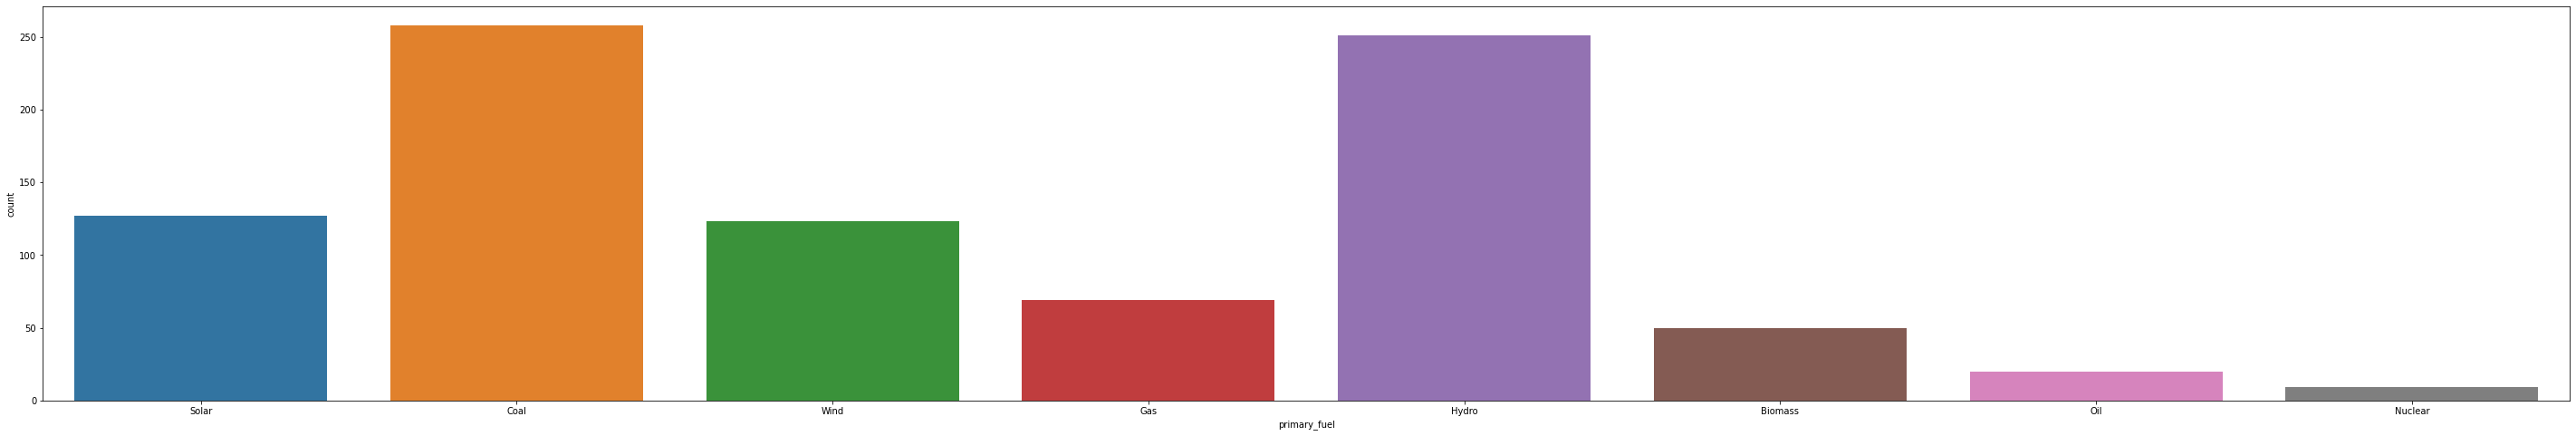

In [88]:
#Primary Fuel
plt.figure(figsize=(50,8))
ax=sns.countplot(x='primary_fuel',data=df)
print(df['primary_fuel'].value_counts())

The Value Counts in country -  Counter({'IND': 907})
The Value Counts in country_long -  Counter({'India': 907})
The Value Counts in name -  Counter({'ACME Solar Tower': 1, 'ADITYA CEMENT WORKS': 1, 'AES Saurashtra Windfarms': 1, 'AGARTALA GT': 1, 'AKALTARA TPP': 1, 'AKRIMOTA LIG': 1, 'ALIYAR': 1, 'ALLAIN DUHANGAN': 1, 'ALMATTI DAM': 1, 'AMAR KANTAK': 1, 'AMARAVATI TPP': 1, 'ANANDPUR SAHIB ST-I&II': 1, 'ANAPARA "C"': 1, 'ANDHRA': 1, 'ANOOPGARH ST I&II': 1, 'ANPARA': 1, 'ANTA GT': 1, 'ANUPPUR': 1, 'ANUPUR TPP': 1, 'ARVINDNAGAR SUGAR': 1, 'ASHOKNAGAR MILL': 1, 'ATHANI SUGAR': 1, 'AURAIYA GT': 1, 'AVANTHA BHANDAR TPP': 1, 'AWARPUR CEMENT PLANT': 1, 'Abhijeet': 1, 'Amarsar Solar Power Plant': 1, 'Anabura Wind Farm': 1, 'Ananthapur - Meil Solar Power Plant': 1, 'Andrha Lake Wind Farm': 1, 'Anikkadavu Wind Farm': 1, 'Arasinagundi Wind Farm': 1, 'Askandra - DREPL Solar Power Plant': 1, 'Askandra - Electromech Maritech Solar Power Plant': 1, 'Askandra - Finehope Solar Power Plant': 1, 'Askandr

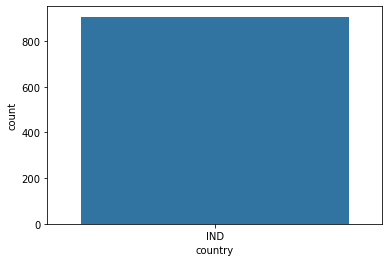

In [89]:
print("The Value Counts in country - ",Counter(df['country']))
print("The Value Counts in country_long - ",Counter(df['country_long']))
print("The Value Counts in name - ",Counter(df['name']))
print("The Value Counts in gppd_idnr - ",Counter(df['gppd_idnr']))
print("The Value Counts in primary_fuel - ",Counter(df['primary_fuel']))
print("The Value Counts in owner - ",Counter(df['owner']))
print("The Value Counts in source - ",Counter(df['source']))
print("The Value Counts in url - ",Counter(df['url']))
print("The Value Counts in geolocation_source - ",Counter(df['geolocation_source']))
print("The Value Counts in generation_data_source - ",Counter(df['generation_data_source']))
#Item_Fat_Content
ax=sns.countplot(x='country',data=df)
print(df['country'].value_counts())

India    907
Name: country_long, dtype: int64


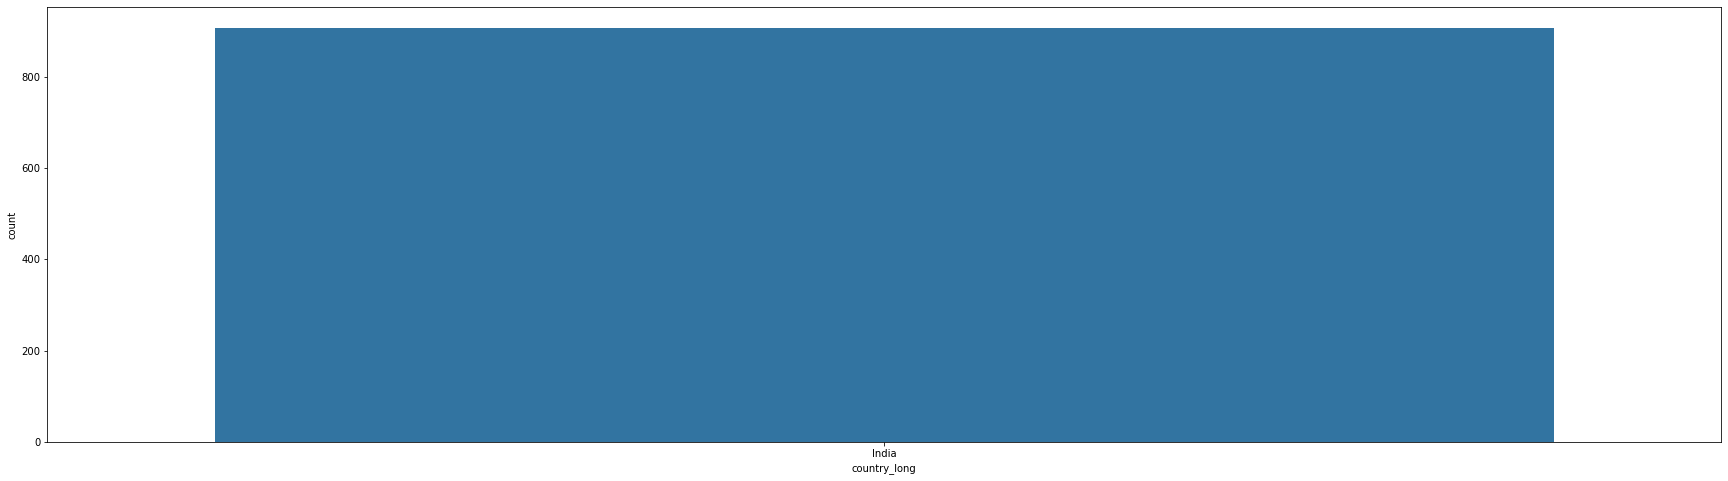

In [90]:
#Item_Type
plt.figure(figsize=(30,8))
ax=sns.countplot(x='country_long',data=df)
print(df['country_long'].value_counts())

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


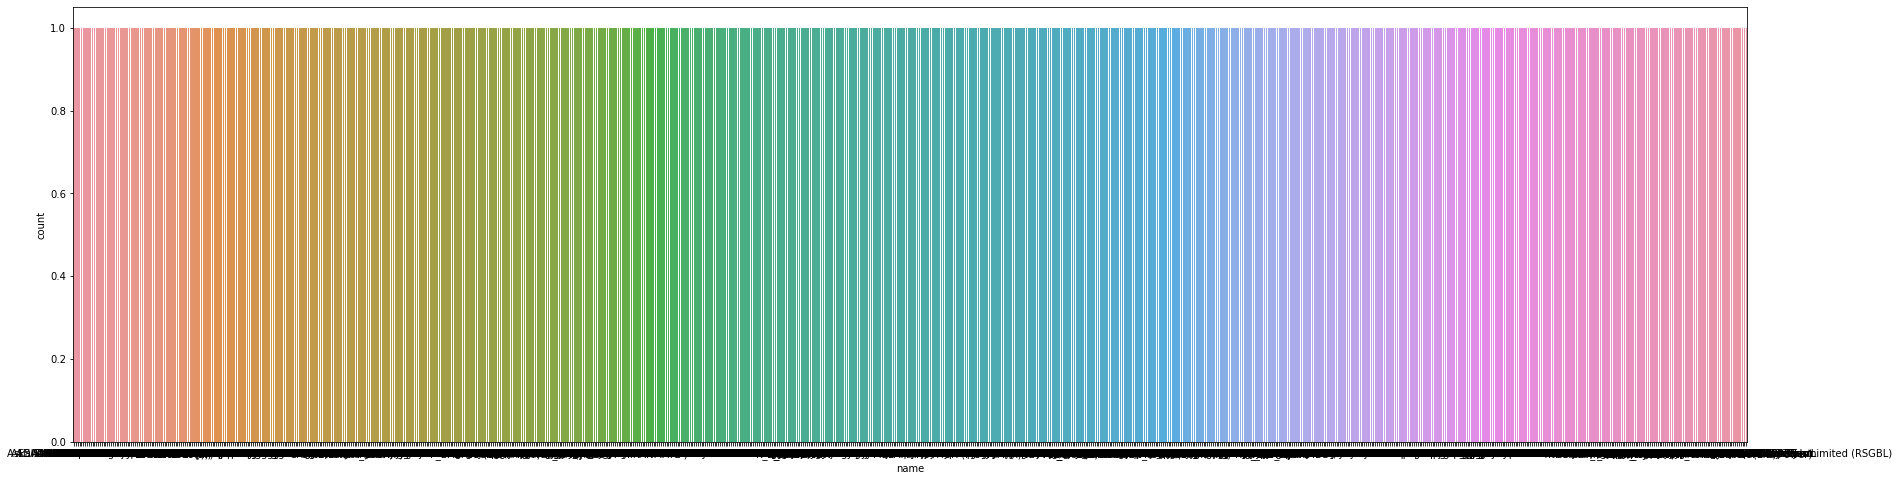

In [91]:
#Outlet_Identifier
plt.figure(figsize=(30,8))
ax=sns.countplot(x='name',data=df)
print(df['name'].value_counts())

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


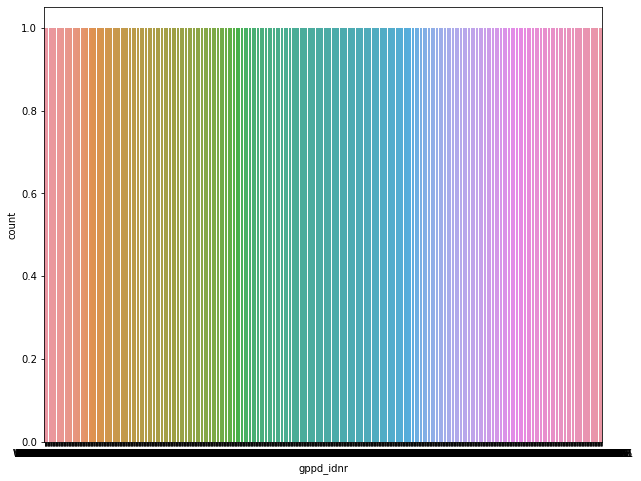

In [92]:
#Outlet_Size
plt.figure(figsize=(10,8))
ax=sns.countplot(x='gppd_idnr',data=df)
print(df['gppd_idnr'].value_counts())

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64


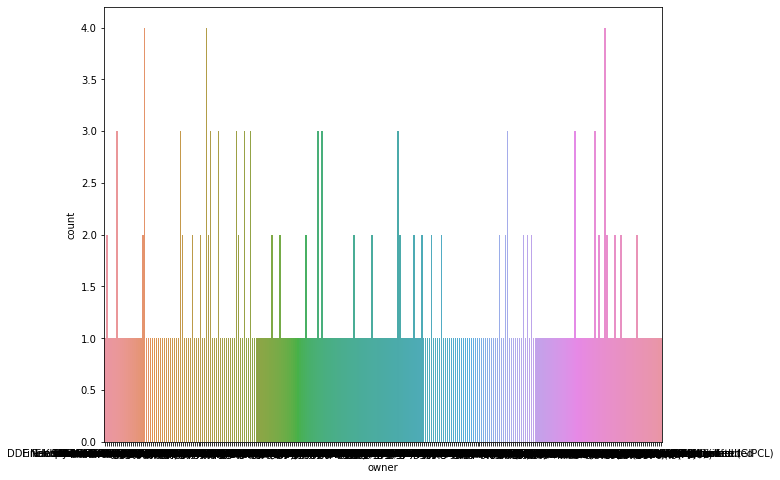

In [93]:
#Outlet_Location_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='owner',data=df)
print(df['owner'].value_counts())

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64


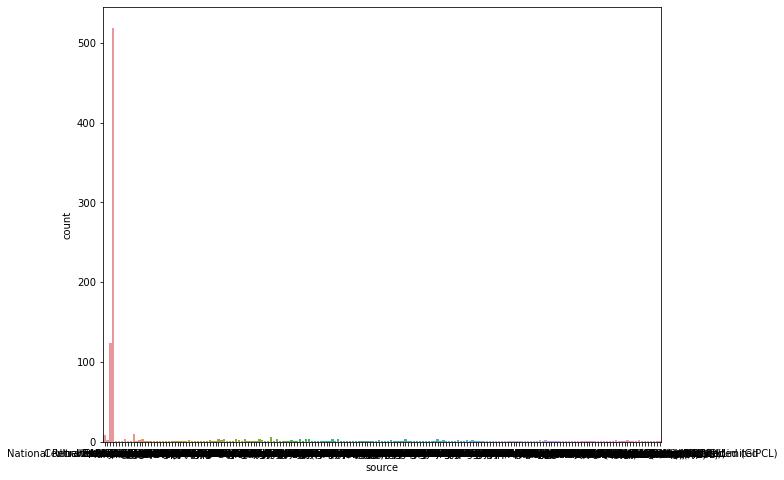

In [94]:
#Outlet_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='source',data=df)
print(df['source'].value_counts())

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


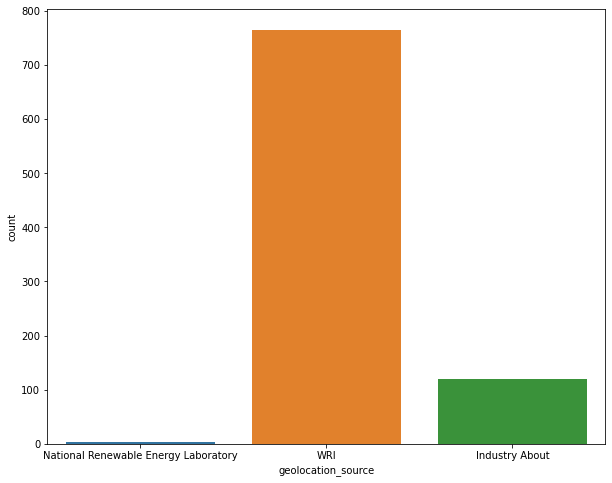

In [95]:
#Outlet_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='geolocation_source',data=df)
print(df['geolocation_source'].value_counts())

Central Electricity Authority    449
Name: generation_data_source, dtype: int64


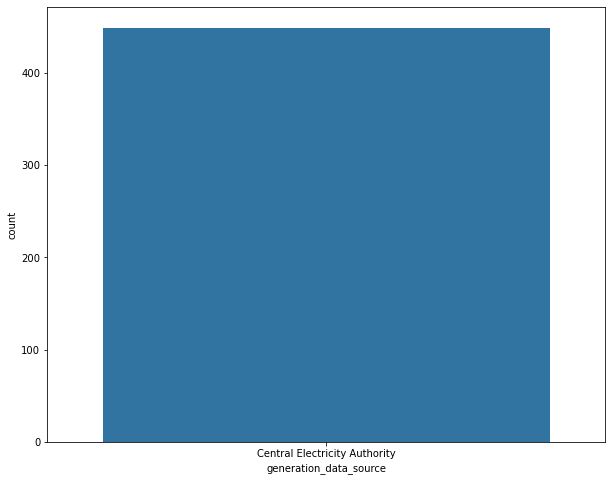

In [96]:
#Outlet_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='generation_data_source',data=df)
print(df['generation_data_source'].value_counts())

# Observations Univariate Analysis on Categorical Data 
From the above count plots 
- In the primary fuel column the most used is coal.
- In the geolocation source column WRI has the highest.
- 

# Step 3.2 Updating Null values

In [97]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [98]:
df['latitude']

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
902    16.2949
903    12.8932
904    15.2758
905    24.3500
906     9.9344
Name: latitude, Length: 907, dtype: float64

We shall update:
- All continous data with the mean
- All Categorical data with the mode
Lets go!

In [99]:
# Fill null values with the mean on the latitude and logtitude column
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [101]:
# lets fill the missing values in these columns with categorical data.
# we will fill them with the model of each categorical data.
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_data_source'].mode()[0])
df['owner']=df['owner'].fillna(df['owner'].mode()[0])
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['generation_data_source']=df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [102]:
# replace zero values with the mean
df['generation_gwh_2014']=df['generation_gwh_2014'].replace(0,df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].replace(0,df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].replace(0,df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].replace(0,df['generation_gwh_2017'].mean())


In [103]:
#rechecing for null values
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

 # Observations on Null Update 
From the above we can see that all null values have been updated! 

# Step 3.3 Encoding
- We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data
- Here we shall adopt Ordinal Encoder to transform the all Non-numerical column into Numerical Data!

In [104]:
#initializing....
enc=OrdinalEncoder()

In [105]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,Central Electricity Authority,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,Central Electricity Authority,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2015.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,Central Electricity Authority,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.0,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.5,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,2015.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,Central Electricity Authority,Central Electricity Authority
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,2015.0,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,Central Electricity Authority,Central Electricity Authority
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,2015.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,Central Electricity Authority,Central Electricity Authority


In [107]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018        object
generation_data_source     object
dtype: object

In [110]:
#Tranforming into numerical data
for i in df.columns:
    if df[i].dtypes=='object':
        print('encoded')
        df[i]=enc.fit_transform(df[i].values)

encoded


ValueError: Expected 2D array, got 1D array instead:
array=['Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 626.239128 7279.0 976.655 48.32715
 579.31885 406.3779 1487.88 3717.154 425.6411 7873.973
 'Central Electricity Authority' 'Central Electricity Authority'
 18697.6559 528.28 'Central Electricity Authority' 6241.801
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 521.0 0.0 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 1268.0
 'Central Electricity Authority' 2279.69425 1848.62045 364.83665 6526.645
 2553.0 1723.54895 'Central Electricity Authority'
 'Central Electricity Authority' 1944.95 1166.342
 'Central Electricity Authority' 575.45825 36.90455 84.8934
 'Central Electricity Authority' 'Central Electricity Authority' 6344.82
 173.72 40.15061665635222 354.40905 9334.0 133.9128 1179.007 0.056
 1269.2021 250.3022 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 0.0
 'Central Electricity Authority' 'Central Electricity Authority' 3787.75
 54.93395 'Central Electricity Authority' 4216.999049999999
 'Central Electricity Authority' 'Central Electricity Authority' 56.1578
 'Central Electricity Authority' 'Central Electricity Authority' 467.43
 76.77420000000001 33.889700000000005 69.849
 'Central Electricity Authority' 3139.308 905.24105 94.09715 314.3205
 6146.422 'Central Electricity Authority' 'Central Electricity Authority'
 2299.63 'Central Electricity Authority' 1294.854
 'Central Electricity Authority' 'Central Electricity Authority' 2750.1
 567.61 2574.062 'Central Electricity Authority' 0.26376 0.0 5552.51
 286.6396 'Central Electricity Authority' 2026.27
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 431.77755258770543 1500.4798999999998 2472.1372 1038.2029
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 3234.93641 14691.62 136.76274999999998
 'Central Electricity Authority' 73.056719805 9478.0 805.48235 629.24795
 48.7152 415.31299999999993 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 2098.731
 9861.136 1605.0 0.0 'Central Electricity Authority' 6469.539
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 3210.1685 3950.566 0.0 146.74259999999998
 218.89005 3268.01 2966.0 1100.67895 20.2349 656.549
 'Central Electricity Authority' 459.9288 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 230.31265
 'Central Electricity Authority' 'Central Electricity Authority' 2262.0131
 'Central Electricity Authority' 856.2 5981.371
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 0.0
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 13847.15
 578.0 'Central Electricity Authority' 680.981
 'Central Electricity Authority' 0.0 'Central Electricity Authority'
 'Central Electricity Authority' 401.811 1527.258
 'Central Electricity Authority' 3326.369 248.6306 596.37315 0.0 0.0
 'Central Electricity Authority' 'Central Electricity Authority' 80.26665
 192.0151 2245.1 'Central Electricity Authority' 213.37775
 'Central Electricity Authority' 3574.98 1110.42 2211.67
 'Central Electricity Authority' 0.0 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 4265.28
 19.11395 'Central Electricity Authority' 241.8646
 'Central Electricity Authority' 23.496 340.821
 'Central Electricity Authority' 545.8371000000001
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 2869.5195
 'Central Electricity Authority' 'Central Electricity Authority' 2738.9845
 577.005 343.7725 2905.82785 135.491 'Central Electricity Authority' 0.0
 72.75 1302.24605 6966.604 5109.03 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 245.765
 'Central Electricity Authority' 196.0548 6016.72
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 798.381
 193.4678 2482.579897 407.70125 7352.32 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 432.57625
 236.20305 373.97075000000007 15305.22 6532.35 7321.2679 220.5517 881.02
 2763.96075 593.1792 5180.6 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 6233.686
 'Central Electricity Authority' 'Central Electricity Authority' 214.17
 370.8564 3948.84655 'Central Electricity Authority' 633.42 1689.378
 'Central Electricity Authority' 117.6488 815.9841305712492
 'Central Electricity Authority' 0.0 1596.42324 7179.0 2428.0 0.0
 'Central Electricity Authority' 'Central Electricity Authority' 126.5895
 202.8009 284.7093 231.08875 367.8316 340.77755
 'Central Electricity Authority' 526.60375 'Central Electricity Authority'
 343.8322 193.10960000000003 5975.5914 2.9836 3926.272 2998.86035
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 0.0
 1629.816 1112.2309 'Central Electricity Authority'
 'Central Electricity Authority' 7681.86 18784.0 4871.167 8971.64935
 'Central Electricity Authority' 7049.638 'Central Electricity Authority'
 1217.7207999999998 606.552 225.474026 2754.11025
 'Central Electricity Authority' 6970.0 145.81725 1600.94505 5562.31
 'Central Electricity Authority' 184.2408 995.621
 'Central Electricity Authority' 656.532 420.99445 268.91865
 'Central Electricity Authority' 'Central Electricity Authority' 134.1658
 3211.443 8633.527 6813.0 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 840.5586379 5127.488 249.10722500000003
 590.8907 0.0 251.26735 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 599.59695
 586.3833500000001 152.54345 'Central Electricity Authority' 219.2184
 522.5541 1088.5897 'Central Electricity Authority' 0.0
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 1367.91 590.7116
 'Central Electricity Authority' 88.54504999999999 2657.132 2991.0 6435.09
 'Central Electricity Authority' 116.4946 'Central Electricity Authority'
 'Central Electricity Authority' 100.8532 6857.95 666.5903
 'Central Electricity Authority' 1724.0763 'Central Electricity Authority'
 0.0 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 126.4941 'Central Electricity Authority'
 6053.26 96.9926 65.08535 6302.955 5428.759 2980.512 5314.336 585.60725
 2934.69 0.0 'Central Electricity Authority'
 'Central Electricity Authority' 655.828 'Central Electricity Authority'
 11179.55 'Central Electricity Authority' 161.18005000000002
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 1237.90935
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 22178.0
 24752.0 88.97290000000001 'Central Electricity Authority'
 'Central Electricity Authority' 2707.839 361.13525
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 2831.84
 2542.9 337.12589999999994 49.6704 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 298.663
 'Central Electricity Authority' 'Central Electricity Authority' 375.96075
 2057.288 'Central Electricity Authority' 0.0 6474.61425 2820.994
 'Central Electricity Authority' 179.12985 2707.337 2691.114 9691.939
 1638.067 1175.805 6915.39 'Central Electricity Authority' 105.02225
 'Central Electricity Authority' 'Central Electricity Authority' 68.0944
 'Central Electricity Authority' 'Central Electricity Authority' 3632.76
 6284.92 'Central Electricity Authority' 'Central Electricity Authority'
 53.0335 101.04225 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 229.87485
 3319.054 608.9798 'Central Electricity Authority'
 'Central Electricity Authority' 0.0 285.0 7904.47
 'Central Electricity Authority' 4515.9548 184.32375 0.0 79.39105 3075.09
 114.01705 120.30545 2354.107 605.2585 'Central Electricity Authority'
 345.40967299999994 4505.33 2536.15147033791 45.7103
 'Central Electricity Authority' 3942.92 'Central Electricity Authority'
 'Central Electricity Authority' 0.0 130.95195
 'Central Electricity Authority' 699.485 475.9 31.5415 1504.9972 94.127
 'Central Electricity Authority' 3476.1991 1479.422 164.175 7200.4 17.2135
 'Central Electricity Authority' 1098.45015 21.93975 505.4202
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 7195.06 332.6484
 'Central Electricity Authority' 'Central Electricity Authority' 2990.0335
 8065.38 'Central Electricity Authority' 3002.607 2566.8
 'Central Electricity Authority' 0.0 79.6199 3614.79411
 'Central Electricity Authority' 8658.17 'Central Electricity Authority'
 187.1993 955.56505 235.74535 1819.62615 1046.59075 347.34455
 'Central Electricity Authority' 1447.2474 'Central Electricity Authority'
 689.008 4378.709 5949.706 0.0 833.7005499999999 21253.624
 558.9014500000001 0.0 'Central Electricity Authority' 437.55 1572.83
 3960.55 'Central Electricity Authority' 372.59 17371.0
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 591.8658 0.0 1508.8180000000002 5487.276
 'Central Electricity Authority' 406.76595 3395.48725 0.0 0.0 0.0 0.0
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 586.4729
 7972.703 'Central Electricity Authority' 3245.672 129.00175000000002
 30905.0 'Central Electricity Authority' 6757.733
 'Central Electricity Authority' 2342.564 9064.815474723968 122.3651
 'Central Electricity Authority' 495.8284 'Central Electricity Authority'
 'Central Electricity Authority' 470.02805 4762.2491 523.0416499999999
 'Central Electricity Authority' 'Central Electricity Authority' 0.0
 'Central Electricity Authority' 201.37805 219.7557
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 2467.2425 11703.0 89.541 8207.13 13610.0
 'Central Electricity Authority' 22625.0 287.0 282.76905 1604.0
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 257.4394 1368.43345 548.31465 980.2541
 'Central Electricity Authority' 528.24 100.68405 6104.3
 'Central Electricity Authority' 3083.37 6476.696 92.08725
 'Central Electricity Authority' 10.9472 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 7275.43 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 151.7773
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 3224.0 19850.0 9859.5 6660.853 450.62555
 2051.41 0.0 9845.76 421.61135 'Central Electricity Authority' 85.04265
 2687.9527000000003 704.9077500000001 569.1996999999999 4237.108
 3156.2196000000004 1473.96 'Central Electricity Authority' 30.54
 'Central Electricity Authority' 'Central Electricity Authority'
 110.40519999999998 'Central Electricity Authority' 20518.0 0.0 2289.49
 1221.5 2549.71 0.0 1371.0 'Central Electricity Authority' 4721.0 0.0
 167.59779999999998 'Central Electricity Authority' 5807.854 5113.271 0.0
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 373.742895 'Central Electricity Authority' 1729.12 4883.79
 'Central Electricity Authority' 'Central Electricity Authority' 6380.704
 209.5271 250.45145 'Central Electricity Authority' 6552.0 0.0
 'Central Electricity Authority' 2131.1308000000004 918.63375 473.9583
 304.44015 2505.897 'Central Electricity Authority' 3033.04855 1573.0154
 'Central Electricity Authority' 400.65 177.7023
 'Central Electricity Authority' 'Central Electricity Authority' 153.39915
 347.869 7111.42 1125.961 1237.57105 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority' 0.0
 'Central Electricity Authority' 'Central Electricity Authority' 6949.37
 2953.555 1082.090254 'Central Electricity Authority' 35136.0
 'Central Electricity Authority' 1922.3599 903.13
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 7582.3 940.39
 'Central Electricity Authority' 'Central Electricity Authority' 236.4916
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority' 3039.66118
 'Central Electricity Authority' 0.0 686.5 'Central Electricity Authority'
 'Central Electricity Authority' 'Central Electricity Authority'
 'Central Electricity Authority'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [111]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,0.0,0.0,657.0,2.5,28.1839,73.2407,6.0,2011.0,229.0,109.0,128.0,1.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,Central Electricity Authority,Central Electricity Authority
1,0.0,0.0,1.0,519.0,98.0,24.7663,74.6090,1.0,2015.0,258.0,174.0,173.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,Central Electricity Authority,Central Electricity Authority
2,0.0,0.0,2.0,853.0,39.2,21.9038,69.3732,7.0,2015.0,2.0,21.0,205.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,Central Electricity Authority,Central Electricity Authority
3,0.0,0.0,3.0,0.0,135.0,23.8712,91.3602,2.0,2004.0,5.0,22.0,58.0,2.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,0.0,0.0,4.0,1.0,1800.0,21.9603,82.4091,1.0,2015.0,5.0,22.0,58.0,2.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.0,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,902.0,491.0,1600.0,16.2949,77.3568,1.0,2016.0,5.0,22.0,58.0,2.0,2019.0,2431.823590,0.994875,233.596650,865.400000,686.5,Central Electricity Authority
903,0.0,0.0,903.0,822.0,3.0,12.8932,78.1654,6.0,2015.0,114.0,77.0,22.0,0.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,Central Electricity Authority,Central Electricity Authority
904,0.0,0.0,904.0,891.0,25.5,15.2758,75.5811,7.0,2015.0,5.0,21.0,260.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,Central Electricity Authority,Central Electricity Authority
905,0.0,0.0,905.0,539.0,80.0,24.3500,73.7477,1.0,2015.0,91.0,59.0,82.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,Central Electricity Authority,Central Electricity Authority


In [114]:
df['generation_gwh_2018']

0      Central Electricity Authority
1      Central Electricity Authority
2      Central Electricity Authority
3                         626.239128
4                             7279.0
                   ...              
902                            686.5
903    Central Electricity Authority
904    Central Electricity Authority
905    Central Electricity Authority
906    Central Electricity Authority
Name: generation_gwh_2018, Length: 907, dtype: object

In [118]:
df['generation_data_source'].values

array(['Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central Electricity Authority',
       'Central Electricity Authority', 'Central El

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052


In [119]:
# lets drop these two columns because its not really important

df.drop(columns=['generation_gwh_2018','generation_data_source'],axis=1,inplace=True)

In [121]:
# lets drop these two columns because its not really important

df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [122]:
df.tail()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
902,902.0,491.0,1600.0,16.2949,77.3568,1.0,2016.0,5.0,22.0,58.0,2.0,2019.0,2431.82359,0.994875,233.596650,865.400000
903,903.0,822.0,3.0,12.8932,78.1654,6.0,2015.0,114.0,77.0,22.0,0.0,2019.0,2431.82359,2428.226946,2467.936859,2547.759305
904,904.0,891.0,25.5,15.2758,75.5811,7.0,2015.0,5.0,21.0,260.0,2.0,2019.0,2431.82359,2428.226946,2467.936859,2547.759305
905,905.0,539.0,80.0,24.3500,73.7477,1.0,2015.0,91.0,59.0,82.0,2.0,2019.0,2431.82359,2428.226946,2467.936859,2547.759305
906,906.0,876.0,16.5,9.9344,77.4768,7.0,2015.0,279.0,21.0,245.0,2.0,2019.0,2431.82359,2428.226946,2467.936859,2547.759305


In [123]:
df.sample(10)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
58,58.0,32.0,42.00,23.807000,91.565000,2.0,2006.0,5.0,22.0,58.0,2.0,2019.0,304.832800,231.626436,187.193669,178.106690
871,871.0,649.0,30.75,23.075200,77.552600,1.0,2015.0,263.0,180.0,302.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305
112,112.0,714.0,1.00,28.368300,73.528600,6.0,2015.0,3.0,2.0,46.0,0.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305
495,495.0,265.0,28.30,15.266600,76.328800,3.0,1963.0,5.0,22.0,58.0,2.0,2019.0,106.664000,61.520850,31.332550,51.123100
322,322.0,168.0,32.50,10.932500,79.821600,2.0,2000.0,5.0,22.0,58.0,2.0,2019.0,95.035579,212.919179,231.324710,212.377444
832,832.0,817.0,22.00,27.413700,72.157700,6.0,2015.0,272.0,186.0,176.0,0.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305
523,523.0,276.0,630.00,19.981700,73.889600,1.0,1980.0,5.0,22.0,58.0,2.0,2019.0,3730.102000,3870.069500,2972.753000,2580.145000
854,854.0,463.0,240.00,18.031300,82.017900,3.0,1981.0,5.0,22.0,58.0,2.0,2019.0,519.857650,462.953600,338.707950,479.808900
898,898.0,884.0,42.00,27.171500,70.687700,7.0,2015.0,153.0,21.0,212.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305
732,732.0,400.0,6.60,21.197918,77.464907,3.0,1993.0,5.0,22.0,58.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305


In [124]:
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000
mean,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,2004.594267,56.169791,43.847850,94.469680,1.733186,2019.0,2506.896424,2500.511541,2549.566523,2637.647174
std,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,15.734928,82.529116,44.642818,70.381222,0.677151,0.0,2629.757090,2827.530635,2841.461051,2880.593843
min,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,2019.0,0.045355,0.118300,0.099500,0.425769
25%,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,1998.000000,5.000000,22.000000,58.000000,2.000000,2019.0,1687.488000,1370.462900,1365.502290,1472.802025
50%,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,2014.000000,5.000000,22.000000,58.000000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305
75%,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,2015.000000,95.500000,29.500000,115.500000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305
max,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000


In [125]:
df.dtypes

name                     float64
gppd_idnr                float64
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel             float64
commissioning_year       float64
owner                    float64
source                   float64
url                      float64
geolocation_source       float64
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
dtype: object

In [127]:
# lets drop these two columns because its not really important

df.drop(columns=['name','url','year_of_capacity_data','commissioning_year'],axis=1,inplace=True)

# Observations on Encoding
Frome the above its crystal clear that all Non-numrical data have been converted(encoded) to Numerical Data!

# Step 3.4 - Normal Distribution Check(Univariate Analysis)

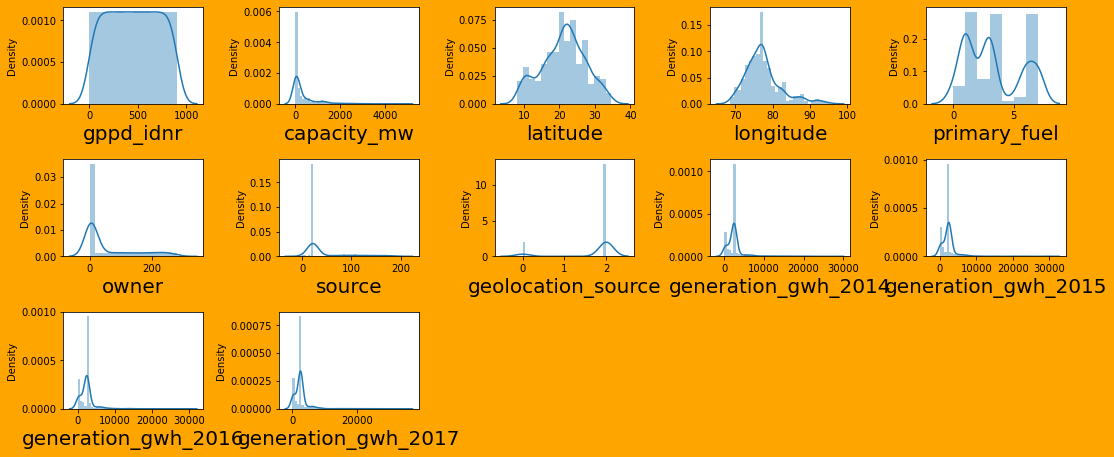

In [128]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='orange')#dimension and color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=17:
        ax = plt.subplot(4,5,plotnumber)#2,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot:

- We can see that All the features does not obey a normal distribution, the building blocks is not in tandem with a normalized     curve

- The normal distribution of these features; 'Item_Identifier', 'Item_Fat_Content','Item_Type', 'Outlet_Identifier'               'Outlet_Size', 'Outlet_Location_Type','Outlet_Type' has no contribution to our Model Building since they are categorical data

- The normal distribution of the Item_Outlet_sales columns also has no contribution to our Model Building since its the Target     variable

In [129]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=df.drop(columns=['capacity_mw'],axis=1)
features

,gppd_idnr,latitude,longitude,primary_fuel,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,657.0,28.1839,73.2407,6.0,229.0,109.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305
1,519.0,24.7663,74.6090,1.0,258.0,174.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305
2,853.0,21.9038,69.3732,7.0,2.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305
3,0.0,23.8712,91.3602,2.0,5.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500
4,1.0,21.9603,82.4091,1.0,5.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...
902,491.0,16.2949,77.3568,1.0,5.0,22.0,2.0,2431.823590,0.994875,233.596650,865.400000
903,822.0,12.8932,78.1654,6.0,114.0,77.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305
904,891.0,15.2758,75.5811,7.0,5.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305
905,539.0,24.3500,73.7477,1.0,91.0,59.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305


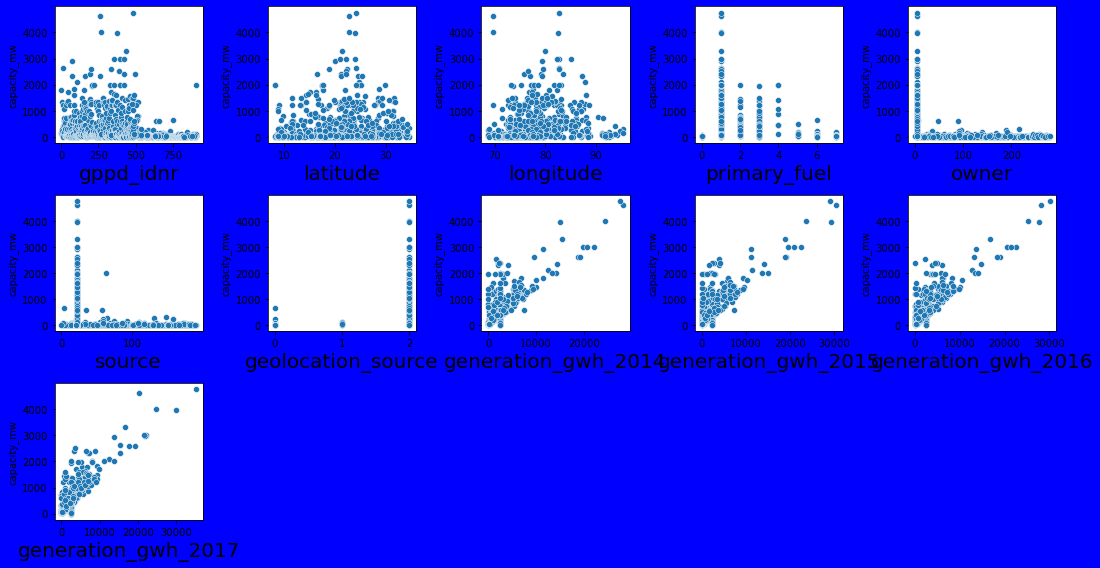

In [131]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=15:#since there are 3 features
        ax = plt.subplot(3,5,plotnumber)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=features[column],y=df['capacity_mw'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot

From the above scatter plot we can see a strong relationship between some of the features and the Label(capacity_mw       ).

# Step 3.5 - Count Plot Check(Bivariate Analysis)
- Lets visualize the relationship between the Categorical features and the Label

# Step 3.6 - Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [132]:
#checking for general correlation
df.corr()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
gppd_idnr,1.000000,-0.335742,-0.105728,-0.377812,0.609180,0.630589,0.416384,-0.464174,0.021116,0.020202,0.007026,0.002518
capacity_mw,-0.335742,1.000000,0.050984,0.195882,-0.380395,-0.311048,-0.242122,0.204865,0.705576,0.716177,0.747254,0.769442
latitude,-0.105728,0.050984,1.000000,0.036362,-0.010204,-0.071182,0.055927,-0.184275,0.039854,0.036167,0.027350,0.025826
longitude,-0.377812,0.195882,0.036362,1.000000,-0.347948,-0.301285,-0.239333,0.252343,0.019092,0.021901,0.041819,0.045004
primary_fuel,0.609180,-0.380395,-0.010204,-0.347948,1.000000,0.284296,0.053613,-0.483217,-0.137544,-0.133534,-0.139115,-0.146975
owner,0.630589,-0.311048,-0.071182,-0.301285,0.284296,1.000000,0.769583,-0.384838,-0.017720,-0.015868,-0.017832,-0.019369
source,0.416384,-0.242122,0.055927,-0.239333,0.053613,0.769583,1.000000,-0.505720,-0.013986,-0.012525,-0.014075,-0.015288
geolocation_source,-0.464174,0.204865,-0.184275,0.252343,-0.483217,-0.384838,-0.505720,1.000000,0.011261,0.010084,0.011332,0.012309
generation_gwh_2014,0.021116,0.705576,0.039854,0.019092,-0.137544,-0.017720,-0.013986,0.011261,1.000000,0.949588,0.922172,0.895122
generation_gwh_2015,0.020202,0.716177,0.036167,0.021901,-0.133534,-0.015868,-0.012525,0.010084,0.949588,1.000000,0.963980,0.924238


In [133]:
#checking for correlation between each feature and Label
df.corr()['capacity_mw'].sort_values()

primary_fuel          -0.380395
gppd_idnr             -0.335742
owner                 -0.311048
source                -0.242122
latitude               0.050984
longitude              0.195882
geolocation_source     0.204865
generation_gwh_2014    0.705576
generation_gwh_2015    0.716177
generation_gwh_2016    0.747254
generation_gwh_2017    0.769442
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

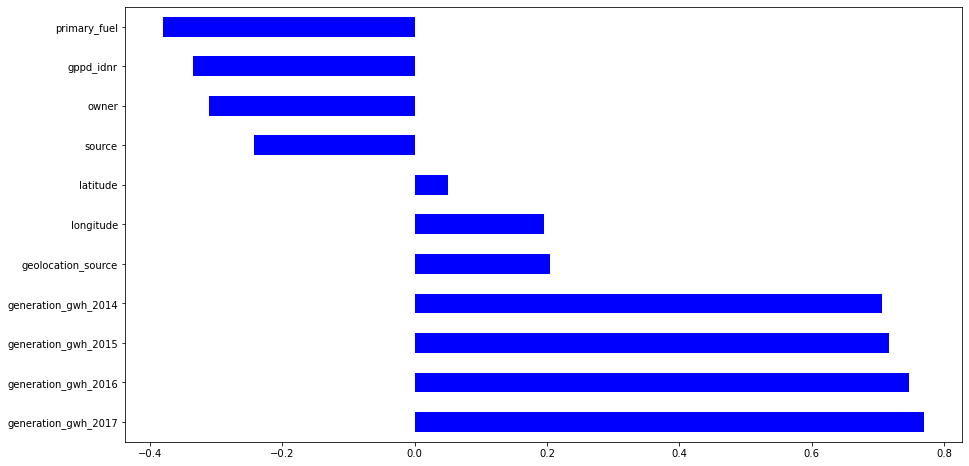

In [134]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='barh', color='b')
plt.show()

# Multicollinearity Check

<AxesSubplot:>

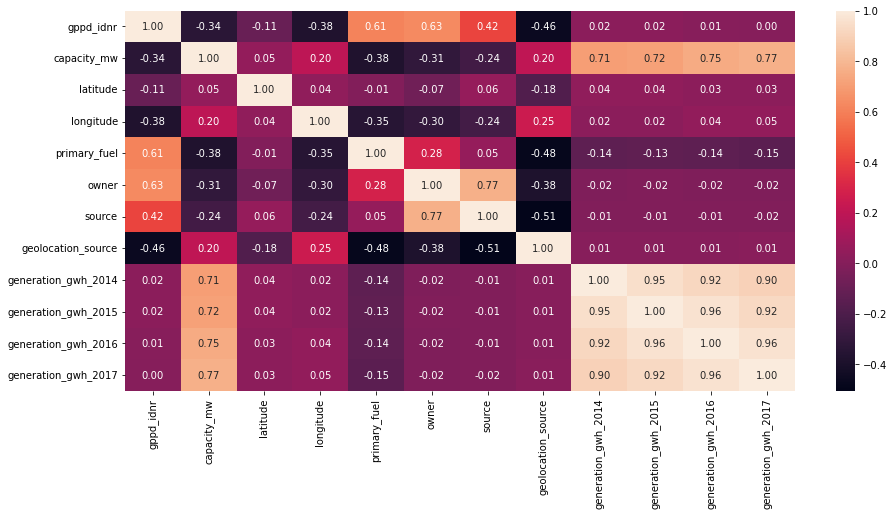

In [135]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

Hmmmm....we can see that some features share a 'direct relationship' between each other! as the majority of the map-squares are not bright! But lets conlcude with our findings first:

<function matplotlib.pyplot.show(close=None, block=None)>

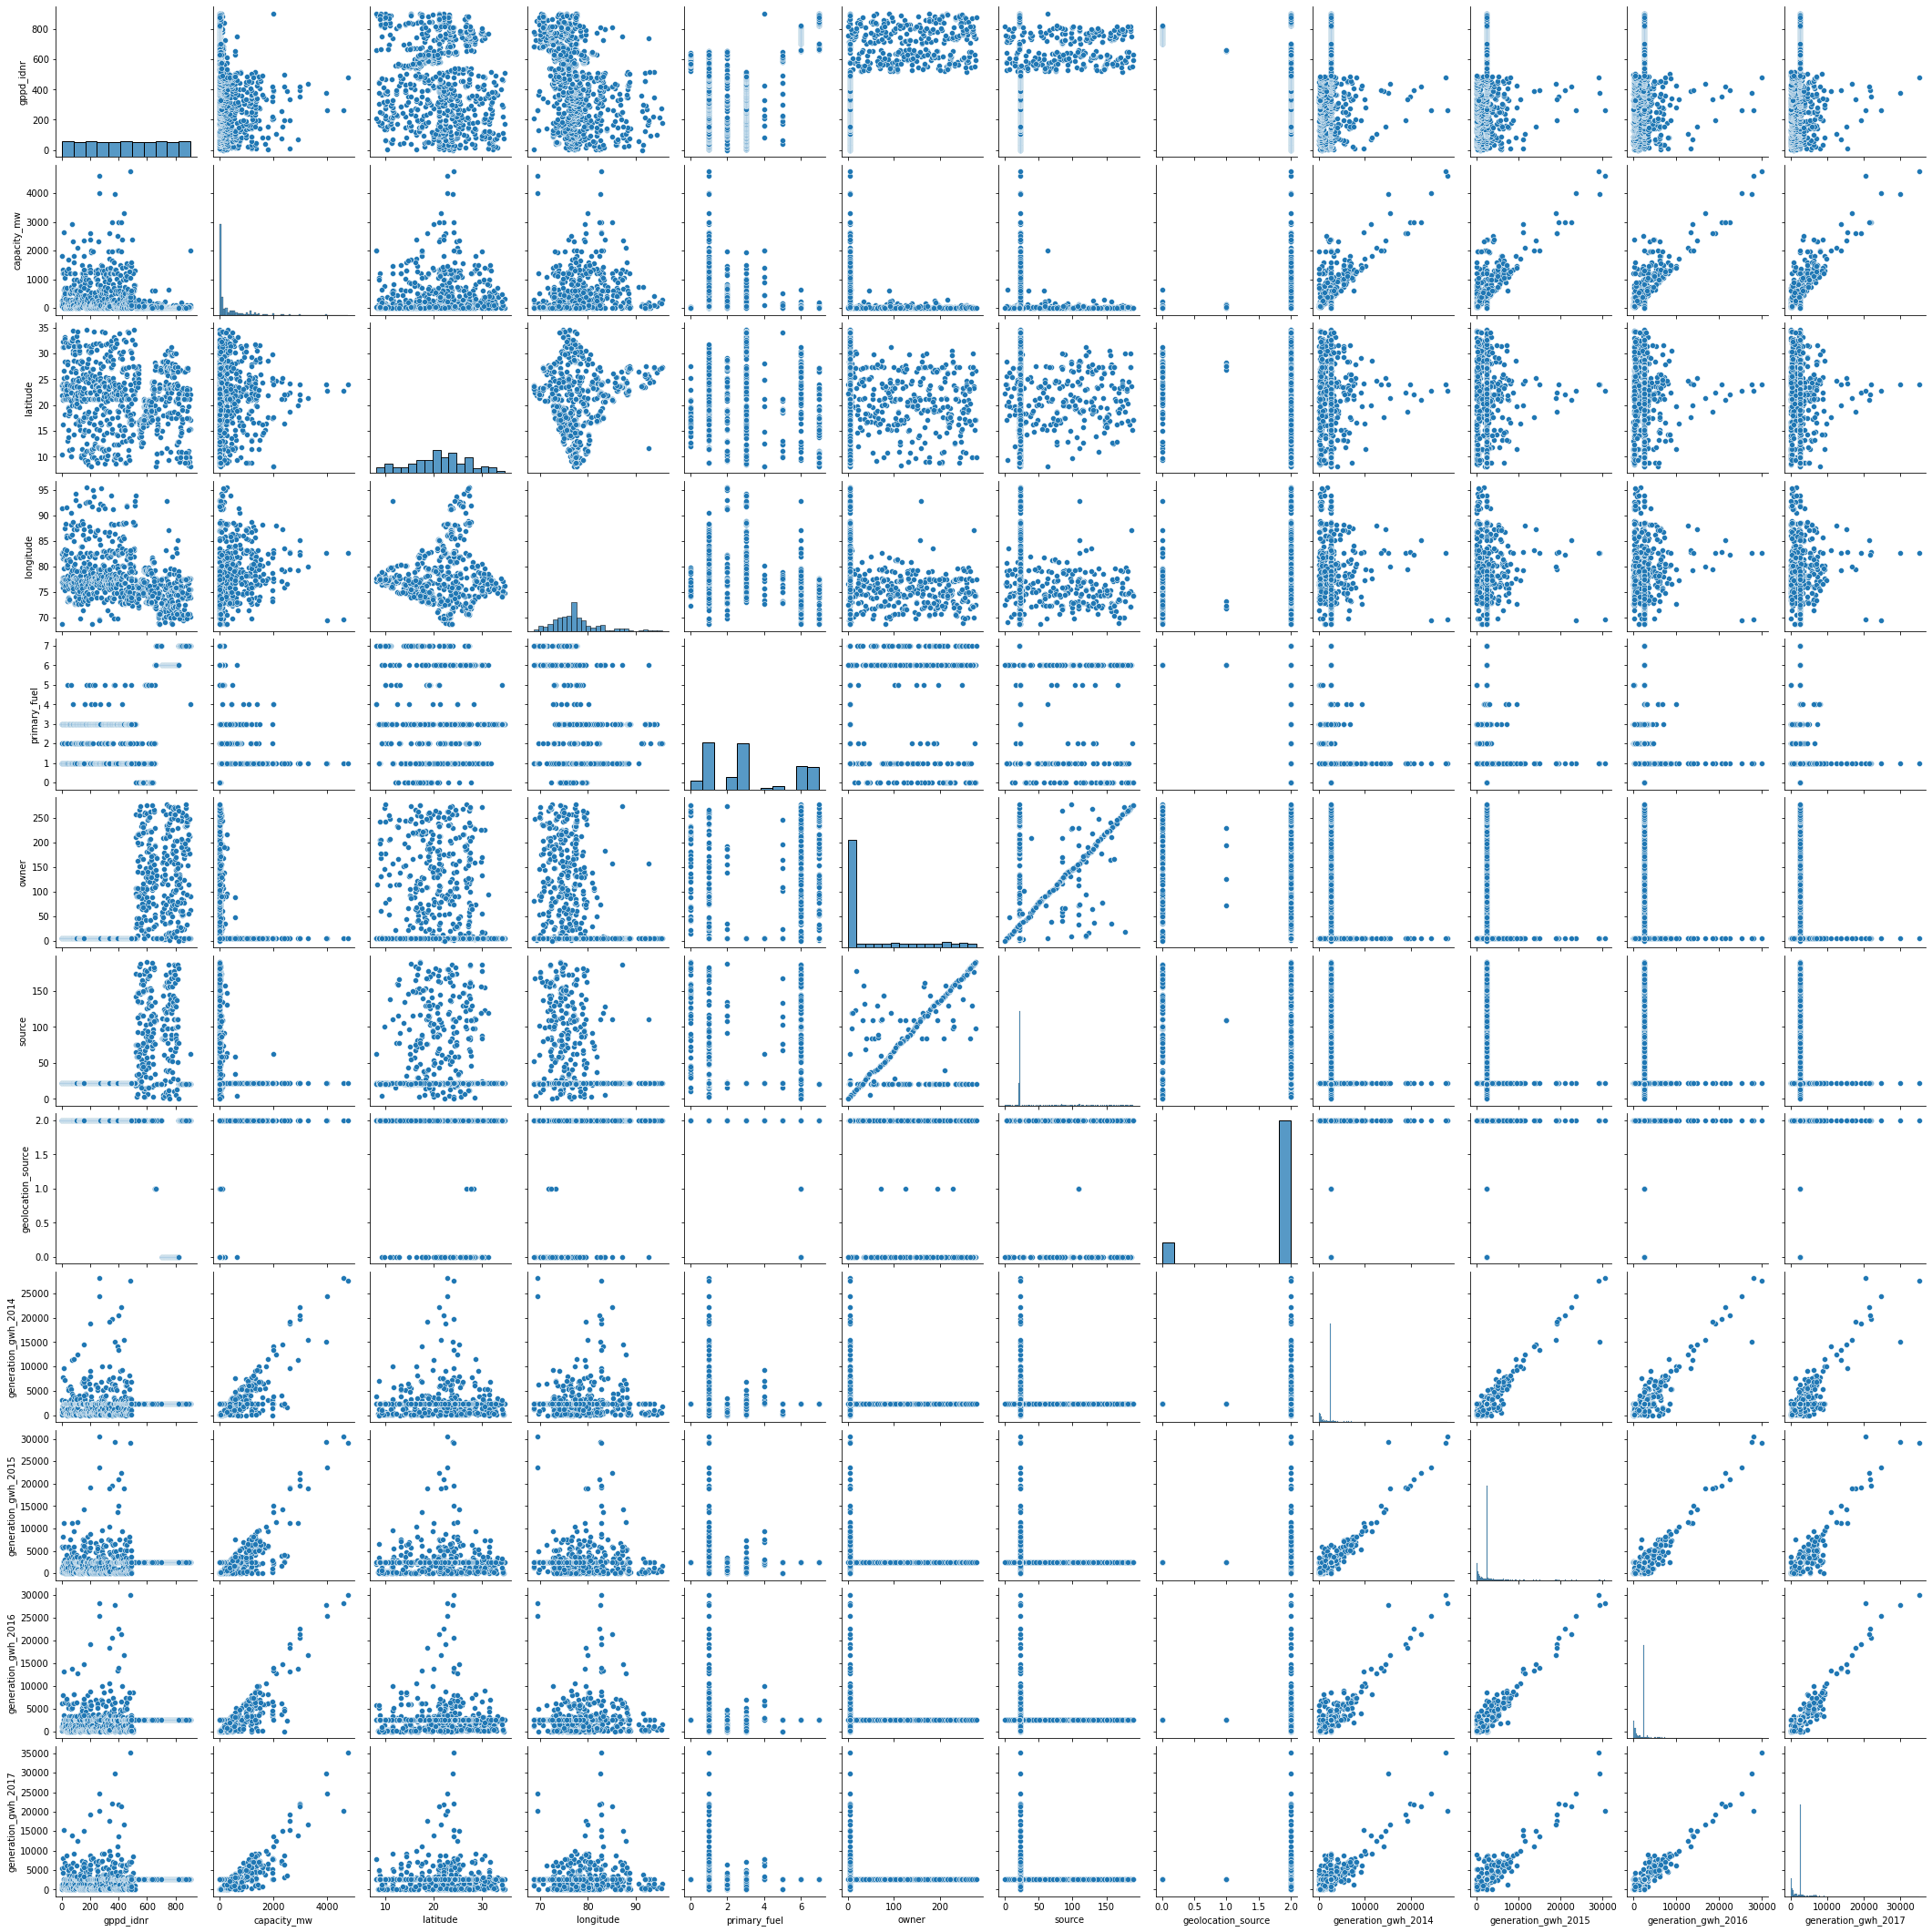

In [136]:
#lets also consumate further our quest for Multicollinearity check by ploting a pair plot
sns.pairplot(df)
plt.show

In [137]:
df.corr()['capacity_mw'].sort_values()

primary_fuel          -0.380395
gppd_idnr             -0.335742
owner                 -0.311048
source                -0.242122
latitude               0.050984
longitude              0.195882
geolocation_source     0.204865
generation_gwh_2014    0.705576
generation_gwh_2015    0.716177
generation_gwh_2016    0.747254
generation_gwh_2017    0.769442
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

# Observations on Correlation(Collinearity & Multicollinearity)
From the above correlation statistics;

 - primary_fuel has a negative correlation of 38% with the target column which can be considered as a moderate bond
 - gppd_idnr  has a negative correlation of 33% with the target column which can be considered as a moderate bond
 - owner  has a negative correlation of 31% with the target column which can be considered as a moderate bond
 - source has a negative correlation of 24% with the target column which can be considered as a weak bond
 - latitude  has a positive correlation of 5% with the target column which can be considered as a poor bond
 - longitude  has a positive correlation of 19.5% with the target column which can be considered as a weak bond
 - geolocation_source  has a positive correlation of 20% with the target column which can be considered as a  weak bond
 - generation_gwh_2015  has a positive correlation of 70% with the target column which can be considered as a strong bond
 - generation_gwh_2015  has a positive correlation of 71% with the target column which can be considered as a strongbond
 - generation_gwh_2016   has a positive correlation of 75% with the target column which can be considered as a strong bond
 - generation_gwh_2017  has a positive correlation of 77% with the target column which can be considered as a strong bond

 
 - Feature with Maximum correlation = '77%'
 - Feature with Minimum correlation = '5%'
 
Multicollinearity:
 - From the heatmap we can see that the some of the  pairs of features do have noticeable correllation between them 

But we will reconfrim this during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Step 3.4 - Outlier Check

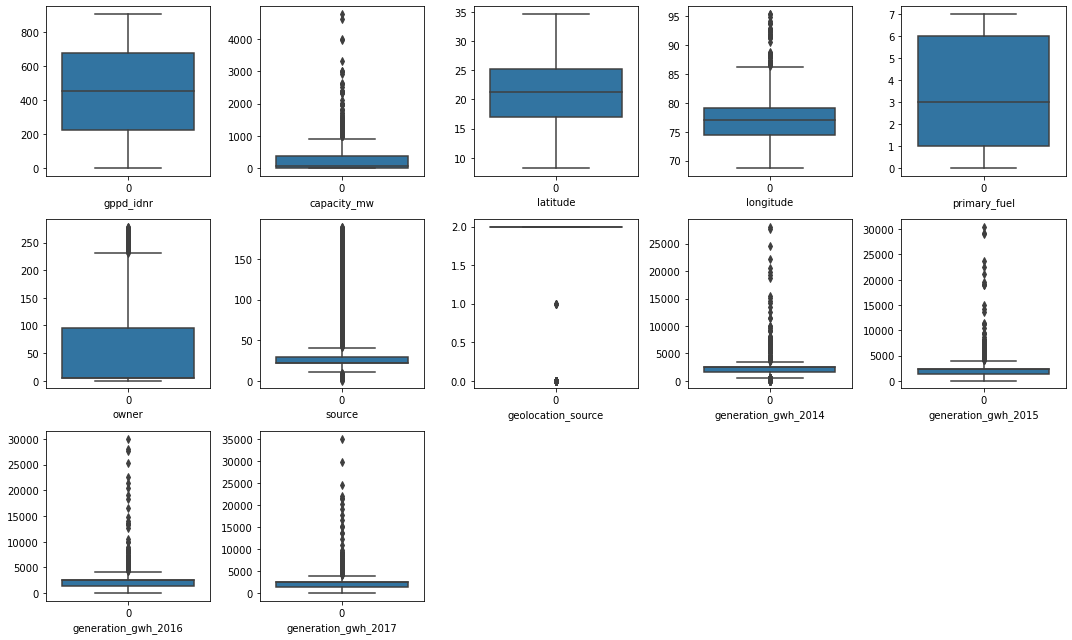

In [138]:
#Check for allien-datapoints in each features data which has been stored in the dataframe; 'features_continuos'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=15:#this was made 8 just to allow for 4 spaces
        plt.subplot(3,5,graph)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot for all columns
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
 - From the above visualization plot its evident feature posses outliers, however this is subject to      further analysis and reconfirmation using the zscore!
 
 -  The outlier of the categorical data does not impact our model
 
 - The outlier of the Target data does not impact our model

# Step 3.5 - Skewness Check

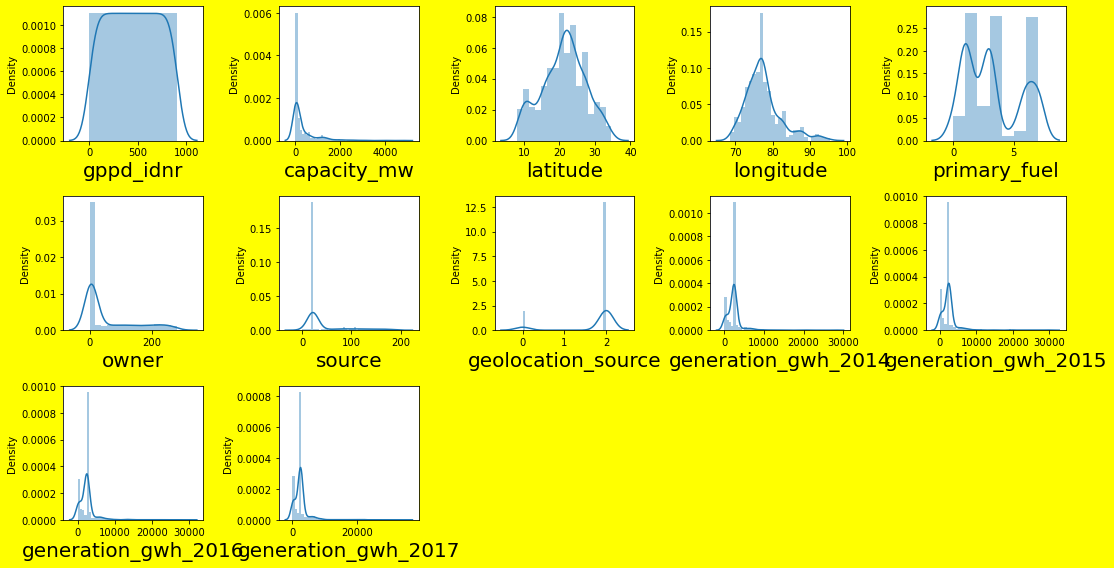

In [139]:
#Visualizing for skewness...
plt.figure(figsize=(15,8), facecolor='yellow')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [140]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
df.skew()

gppd_idnr              0.000000
capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
owner                  1.364406
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    5.181256
generation_gwh_2015    5.489306
generation_gwh_2016    5.201221
generation_gwh_2017    5.262447
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.50.Meaning any value outside +/-0.50 contains skewness. Hence the below features are skewed:

geolocation_source   
generation_gwh_2014  
generation_gwh_2015   
generation_gwh_2016   
generation_gwh_2017  

# Step 4 - DATA PREPROCESSING

# Step 4.1 - Removal of Duplicates and Unwanted Column

In [141]:
#Recheking shape of original data
df.shape

(907, 12)

In [142]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(907, 12)

It appears there are no duplicates since there is no change in the number of rows!

# Step 4.2 - Dropping of Features that strongly promotes multicollinearity(VIF)

<AxesSubplot:>

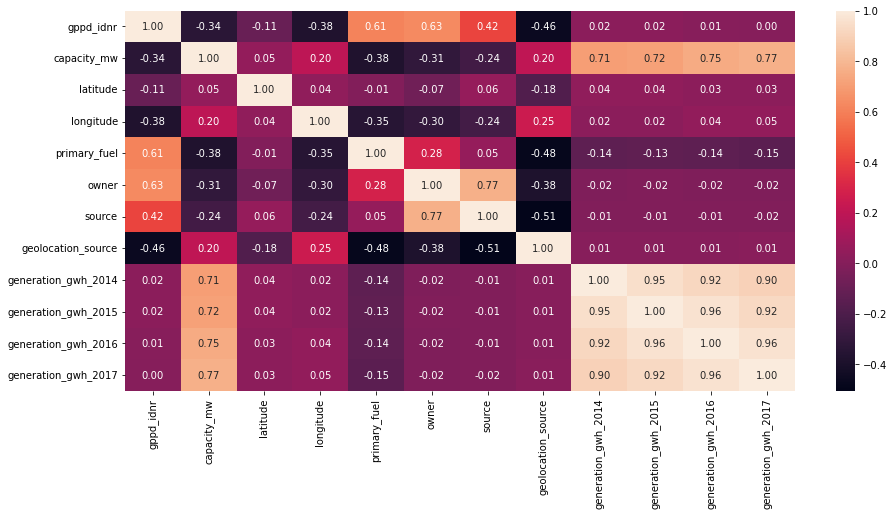

In [143]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap above we can see that there is no visible correlation between one another

However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [144]:
X=df.drop(columns=['capacity_mw'])
Y=df['capacity_mw']

In [145]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 0.77913689,  1.14980517, -0.87827973, ..., -0.02557867,
        -0.02874391, -0.03122185],
       [ 0.2520737 ,  0.58731099, -0.59378844, ..., -0.02557867,
        -0.02874391, -0.03122185],
       [ 1.52771939,  0.11617932, -1.68239437, ..., -0.02557867,
        -0.02874391, -0.03122185],
       ...,
       [ 1.67285273, -0.97470651, -0.39167342, ..., -0.02557867,
        -0.02874391, -0.03122185],
       [ 0.32845967,  0.51879322, -0.77286638, ..., -0.02557867,
        -0.02874391, -0.03122185],
       [ 1.61556326, -1.85383409,  0.0024727 , ..., -0.02557867,
        -0.02874391, -0.03122185]])

In [146]:
#checking the shape
X_Scaled.shape

(907, 11)

Now we shall treat the above shape as an array of numbers(tuple) where 8523 and 11 are the zeroth and first index respectively.

In [147]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [148]:
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(3) or (0,1,2), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 3. Now all the columns in X_Scaled which is (0,1,2) will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [149]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘sales’ )
vif

,vif,Features
0,2.648659,gppd_idnr
1,1.098943,latitude
2,1.232722,longitude
3,2.417042,primary_fuel
4,3.759660,owner
5,3.804335,source
6,2.122474,geolocation_source
7,10.446059,generation_gwh_2014
8,21.998510,generation_gwh_2015
9,27.764939,generation_gwh_2016


From the above vif dataframe,we are setting a vif threshold of 6, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption, MULTICOLLINEARITY DOES NOT EXIST!

# Step 4.3 - Removal of Outliers

This will be achieved using the zscore

In [150]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.779137,0.548908,1.149805,0.878280,1.225688,2.095328,1.460215,1.083349,0.028563,0.025579,0.028744,0.031222
1,0.252074,0.386977,0.587311,0.593788,0.967877,2.446913,2.917019,0.394241,0.028563,0.025579,0.028744,0.031222
2,1.527719,0.486679,0.116179,1.682394,1.664401,0.656734,0.512075,0.394241,0.028563,0.025579,0.028744,0.031222
3,1.730142,0.324240,0.439989,2.889052,0.529164,0.620363,0.489662,0.394241,0.718754,0.586264,0.585783,0.685609
4,1.726323,2.498942,0.125479,1.027976,0.967877,0.620363,0.489662,0.394241,0.201138,1.208738,1.300553,0.954473
...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.145133,2.159821,0.806975,0.022477,0.967877,0.620363,0.489662,0.394241,0.028563,0.884480,0.815513,0.615576
903,1.409321,0.548060,1.366853,0.145644,1.225688,0.701112,0.743019,2.560940,0.028563,0.025579,0.028744,0.031222
904,1.672853,0.509909,0.974707,0.391673,1.664401,0.620363,0.512075,0.394241,0.028563,0.025579,0.028744,0.031222
905,0.328460,0.417498,0.518793,0.772866,0.967877,0.422268,0.339596,0.394241,0.028563,0.025579,0.028744,0.031222


In [151]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(907, 12)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [152]:
#index number
np.where(z>3)

(array([ 15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 147, 158,
        179, 183, 191, 209, 209, 209, 209, 209, 244, 299, 308, 308, 308,
        308, 308, 321, 323, 333, 340, 345, 360, 363, 364, 364, 364, 364,
        364, 375, 416, 427, 482, 493, 493, 493, 493, 493, 494, 494, 494,
        494, 494, 499, 519, 546, 577, 638, 648, 648, 648, 648, 648, 657,
        657, 657, 657, 657, 661, 669, 689, 695, 695, 695, 695, 695, 721,
        721, 721, 724, 724, 724, 724, 726, 726, 726, 726, 726, 767, 786,
        786, 786, 786, 786, 788, 808, 808, 808, 808, 808, 818, 832, 847,
        870, 871, 879, 880, 880, 880, 880, 880, 895, 900], dtype=int64),
 array([ 1,  9, 10, 11,  6,  6,  1,  8,  9, 10, 11,  1,  8,  3,  3,  6,  1,
         8,  9, 10, 11,  3,  6,  1,  8,  9, 10, 11,  6,  3,  3,  3,  6,  3,
         1,  1,  8,  9, 10, 11,  1,  3,  3,  1,  1,  8,  9, 10, 11,  1,  8,
         9, 10, 11,  3,  3,  3,  3,  3,  1,  8,  9, 10, 11,  1,  8,  9, 10,
        11,  6,  6,  6,  1,  8,  9, 10,

In [153]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#Data still with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (907, 12)
New DataFrame (853, 12)
total_dropped_rows 54


A Total of 54 outliers have been removed! Lets move on! Data is looking great!

In [154]:
#Checking the new dataframe with non-outliers
df_new

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,657.0,2.5,28.1839,73.2407,6.0,229.0,109.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305
1,519.0,98.0,24.7663,74.6090,1.0,258.0,174.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305
2,853.0,39.2,21.9038,69.3732,7.0,2.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305
3,0.0,135.0,23.8712,91.3602,2.0,5.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500
4,1.0,1800.0,21.9603,82.4091,1.0,5.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
902,491.0,1600.0,16.2949,77.3568,1.0,5.0,22.0,2.0,2431.823590,0.994875,233.596650,865.400000
903,822.0,3.0,12.8932,78.1654,6.0,114.0,77.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305
904,891.0,25.5,15.2758,75.5811,7.0,5.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305
905,539.0,80.0,24.3500,73.7477,1.0,91.0,59.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305


Now we need to reset our data having removed outliers.....

In [155]:
#Lets reset our data having removed outliers
df_new.reset_index(inplace=True)
df_new

,index,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,657.0,2.5,28.1839,73.2407,6.0,229.0,109.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305
1,1,519.0,98.0,24.7663,74.6090,1.0,258.0,174.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305
2,2,853.0,39.2,21.9038,69.3732,7.0,2.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305
3,3,0.0,135.0,23.8712,91.3602,2.0,5.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500
4,4,1.0,1800.0,21.9603,82.4091,1.0,5.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,902,491.0,1600.0,16.2949,77.3568,1.0,5.0,22.0,2.0,2431.823590,0.994875,233.596650,865.400000
849,903,822.0,3.0,12.8932,78.1654,6.0,114.0,77.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305
850,904,891.0,25.5,15.2758,75.5811,7.0,5.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305
851,905,539.0,80.0,24.3500,73.7477,1.0,91.0,59.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305


In [156]:
#dropping the index columns which is not needed
df_new.drop('index', axis=1,inplace=True)
df_new

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,657.0,2.5,28.1839,73.2407,6.0,229.0,109.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305
1,519.0,98.0,24.7663,74.6090,1.0,258.0,174.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305
2,853.0,39.2,21.9038,69.3732,7.0,2.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305
3,0.0,135.0,23.8712,91.3602,2.0,5.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500
4,1.0,1800.0,21.9603,82.4091,1.0,5.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
848,491.0,1600.0,16.2949,77.3568,1.0,5.0,22.0,2.0,2431.823590,0.994875,233.596650,865.400000
849,822.0,3.0,12.8932,78.1654,6.0,114.0,77.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305
850,891.0,25.5,15.2758,75.5811,7.0,5.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305
851,539.0,80.0,24.3500,73.7477,1.0,91.0,59.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305


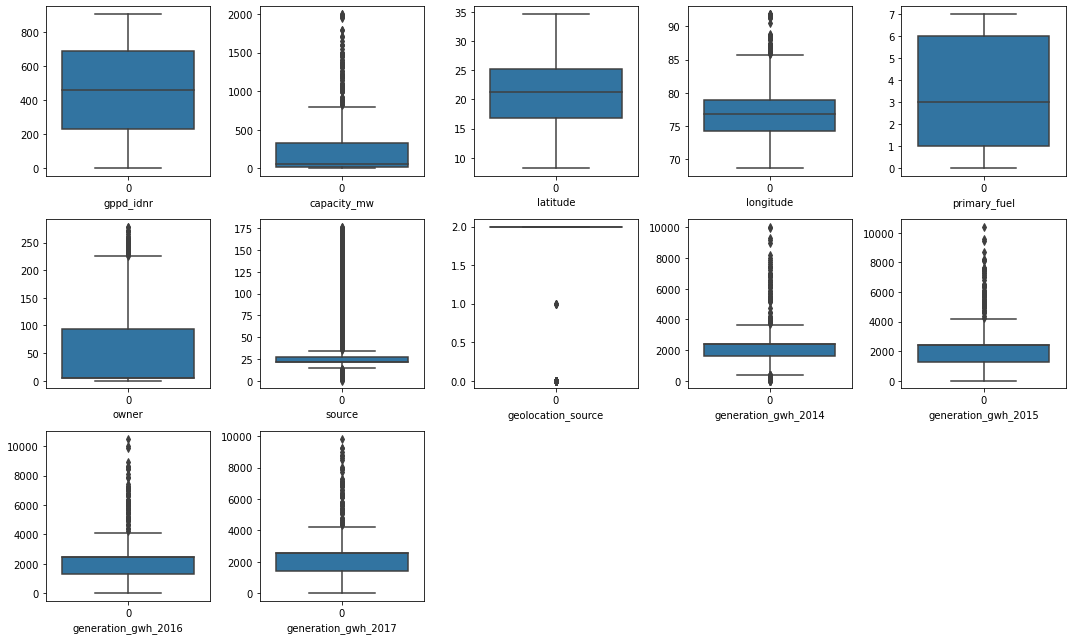

In [157]:
#rechecking for allien-datapoints in each features data which are now stored in df_new
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if graph<=15:
        plt.subplot(3,5,graph)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_new[column])#performing box plots
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

From the above we can see that all outliers have been removed across the features!

# Step 4.4 - Transforming Data to Remove Skewness using Power transformation

In [158]:
#rechecking for skewness...
df_new.skew()

gppd_idnr             -0.020817
capacity_mw            1.987696
latitude              -0.108472
longitude              0.923789
primary_fuel           0.425038
owner                  1.356182
source                 1.820715
geolocation_source    -2.142195
generation_gwh_2014    1.621890
generation_gwh_2015    1.453989
generation_gwh_2016    1.482155
generation_gwh_2017    1.345706
dtype: float64

- Since we don't apply skewness removal on target data, we need to create a sub data frame that does not include the sales         column

- For the skewness data, only the newspaper column has skewness in its data

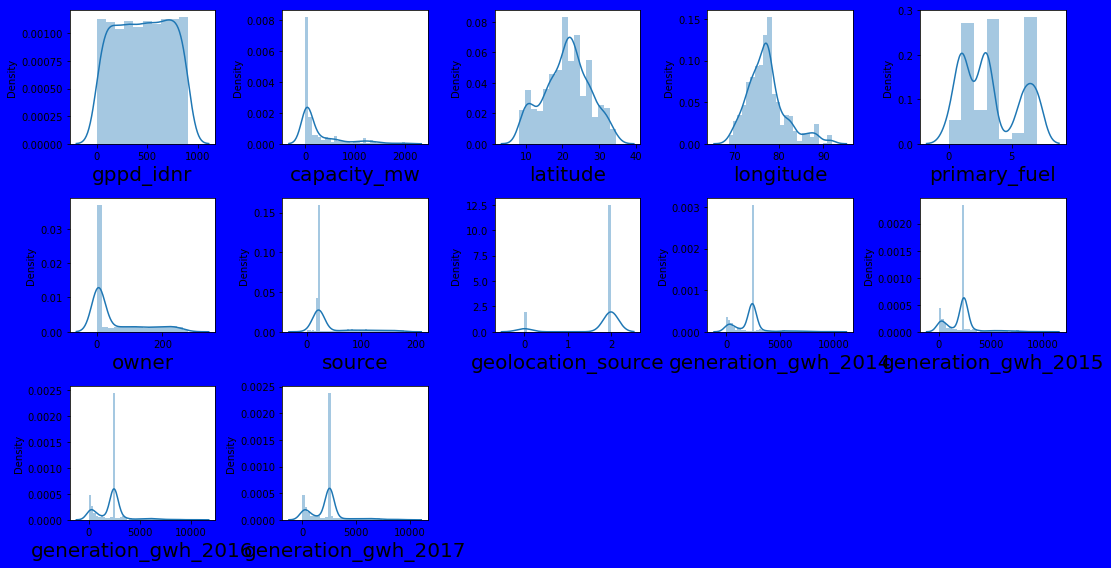

In [159]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=15:#since there are 6 features
        ax = plt.subplot(3,5,plotnumber)#3,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with Length
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

A good Pre-Power Transformation procedure is to ensure that there are no zero values in the data stored in 'cont_features' because from domain knowledge, none of the data values in each features(except Sex column) should be zero!

Let lets go ahead and apply Power Transformation!

In [160]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [164]:
#extracting the columns that are skewed
data=['geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

In [165]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

In [166]:
df_new

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,657.0,2.5,28.1839,73.2407,6.0,229.0,109.0,-2.324600,0.277454,0.306997,0.302651,0.297220
1,519.0,98.0,24.7663,74.6090,1.0,258.0,174.0,0.398675,0.277454,0.306997,0.302651,0.297220
2,853.0,39.2,21.9038,69.3732,7.0,2.0,21.0,0.398675,0.277454,0.306997,0.302651,0.297220
3,0.0,135.0,23.8712,91.3602,2.0,5.0,22.0,0.398675,-1.191837,-0.855144,-0.821663,-1.067181
4,1.0,1800.0,21.9603,82.4091,1.0,5.0,22.0,0.398675,0.647468,2.014939,2.070248,1.658598
...,...,...,...,...,...,...,...,...,...,...,...,...
848,491.0,1600.0,16.2949,77.3568,1.0,5.0,22.0,0.398675,0.277454,-2.200785,-1.578380,-0.874471
849,822.0,3.0,12.8932,78.1654,6.0,114.0,77.0,-2.514391,0.277454,0.306997,0.302651,0.297220
850,891.0,25.5,15.2758,75.5811,7.0,5.0,21.0,0.398675,0.277454,0.306997,0.302651,0.297220
851,539.0,80.0,24.3500,73.7477,1.0,91.0,59.0,0.398675,0.277454,0.306997,0.302651,0.297220


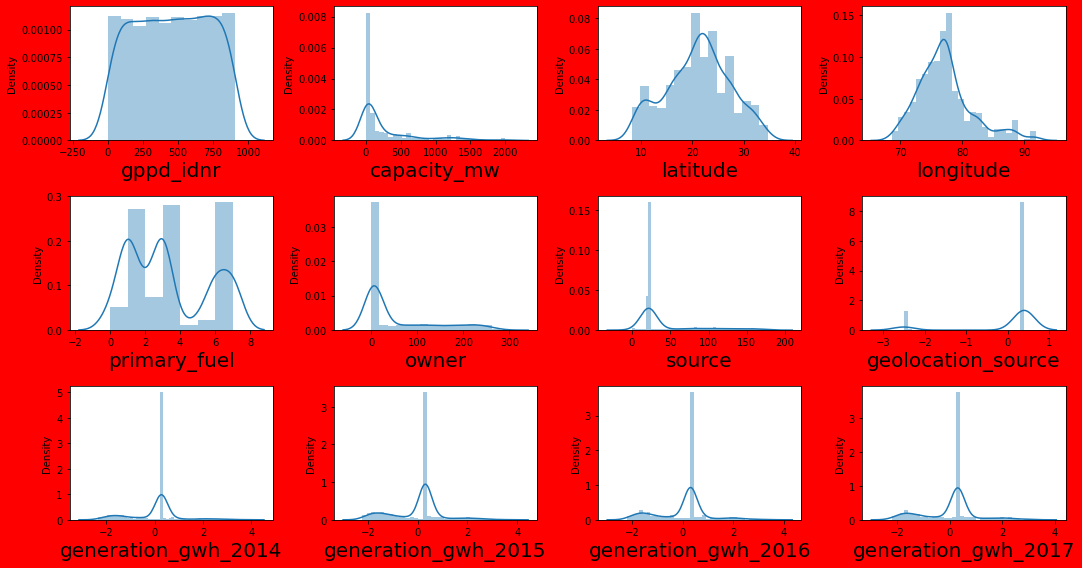

In [169]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=15:#since there are 6 features
        ax = plt.subplot(3,4,plotnumber)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [170]:
#rechecking for skewness
df_new.skew()

gppd_idnr             -0.020817
capacity_mw            1.987696
latitude              -0.108472
longitude              0.923789
primary_fuel           0.425038
owner                  1.356182
source                 1.820715
geolocation_source    -2.113801
generation_gwh_2014   -0.015903
generation_gwh_2015   -0.116798
generation_gwh_2016   -0.103818
generation_gwh_2017   -0.125091
dtype: float64

From the above you can see all skewness in all continuos data are now within the threshold of +/-0.5 which was chosen earlier!

From the above we can see that skewness has been removed!

NOTE:
- All continuos data columns was considered for skewness removal
- The capacity_mw column is not considered for skewness since its the Target data

# Step 4.5 - Seperating the datasets into X and Y variables

In [171]:
#seperation
X=df_new.drop(columns=['capacity_mw'])
Y=df_new['capacity_mw']

# Transforming data into standard normal distribution

In [172]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 0.7597222 ,  1.14974368, -0.89645582, ...,  0.30699672,
         0.30265055,  0.29721968],
       [ 0.23655959,  0.59621024, -0.57967445, ...,  0.30699672,
         0.30265055,  0.29721968],
       [ 1.50276475,  0.13258387, -1.79183839, ...,  0.30699672,
         0.30265055,  0.29721968],
       ...,
       [ 1.64682402, -0.94092375, -0.35461914, ...,  0.30699672,
         0.30265055,  0.29721968],
       [ 0.31238026,  0.52878398, -0.77907794, ...,  0.30699672,
         0.30265055,  0.29721968],
       [ 1.58995852, -1.80604651,  0.08426301, ...,  0.30699672,
         0.30265055,  0.29721968]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [173]:
#reconfirming that mean is 0
X_Scaled.mean()

1.630015175022504e-16

In [174]:
#reconfirming that standard deviation is 1
X_Scaled.std()

1.0

# Step 5 - MODEL BUILDING

# Step 5.1 - Linear Regression

# Best Random State

In [176]:
#Using LinearRegression to get the best Random state
lm=LinearRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  47.08 and 52.07 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  233.72 and 194.97 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  113511.59 and 194.97 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  336.91 and 13.96 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  54.56 and 50.08 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  194.99 and 204.6 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  79120.24 and 204.6 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  281.28 and 14.3 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  42.76 and 52.65 respectively
At random state of :-  2 th

The best accuracy is 62.69% at random state 27

We have found best_random state value as 27. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [177]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=27,test_size=0.20)

In [178]:
x_train.shape

(682, 11)

In [179]:
x_test.shape

(171, 11)

In [180]:
y_train.shape

(682,)

In [181]:
y_test.shape

(171,)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [182]:
lm=LinearRegression()#Initializing...
lm.fit(x_train,y_train)#Training...
pred_test=lm.predict(x_test)#Prediciting using test data...
pred_train=lm.predict(x_train)#Prediciting using training data...
Test_Accuracy_lm= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_lm= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_lm= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_lm= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_lm= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_lm= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_lm= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_lm= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_lm)#printing mean absolute error
print("Test_MSE ", Test_mse_lm)#printing mean squared error
print("Test_RMSE ", Test_rmse_lm)#printing root mean squared error

Test_Accuracy  62.69
Test_MAE  190.07655506068704
Test_MSE  66364.99318758723
Test_RMSE  257.6140391896125


LinearRegression is producing average accuracy 62.69% which is Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [183]:
#Validation accuracy
vac=cross_val_score(lm,X,Y,cv=5)
CV_Score_lm=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lm)

[0.44255306 0.45684208 0.5002732  0.51216914 0.44197416]
Cross Validation Score is  0.47076232848425165


# Difference between Accuracy Score and Cross Validation Score

In [184]:
Test_Accuracy_lm

0.6269433094790708

In [185]:
CV_Score_lm

0.47076232848425165

In [186]:
lm_Acc_vs_CV_Score=np.abs(Test_Accuracy_lm-CV_Score_lm)
print("Difference between Accuracy and Cross Validation Score = ",lm_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.1561809809948192


From the above you can see that difference between Accuracy and Cross Validation score is small (0.156) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.2 - KNN Regressor

# Best Random State

In [187]:
#Using KNeighbors Regressor to get the best Random state
knn=KNeighborsRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  56.93 and 78.64 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  148.47 and 94.4 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  92373.67 and 94.4 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  303.93 and 9.72 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  68.02 and 76.41 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  126.7 and 99.82 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  55686.1 and 99.82 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  235.98 and 9.99 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  71.54 and 77.11 respectively
At random state of :-  2 the mean a

The best accuracy is 78.21% at random state 72

We have found best_random state value as 72. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [188]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=72,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [189]:
knn=KNeighborsRegressor()#Initializing...
knn.fit(x_train,y_train)#Training...
pred_test=knn.predict(x_test)#Prediciting using test data...
pred_train=knn.predict(x_train)#Prediciting using training data...
Test_Accuracy_knn= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_knn= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_knn= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_knn= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_knn= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_knn= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_knn= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_knn= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_knn)#printing mean absolute error
print("Test_MSE ", Test_mse_knn)#printing mean squared error
print("Test_RMSE ", Test_rmse_knn)#printing root mean squared error

Test_Accuracy  78.21
Test_MAE  94.22942807017544
Test_MSE  31052.194106389004
Test_RMSE  176.2163275817227


KNeighbors is producing average accuracy 78.21% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [190]:
#Validation accuracy
vac=cross_val_score(knn,X,Y,cv=5)
CV_Score_knn=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_knn)

[-0.06319702 -0.89634901  0.06879554  0.14402347  0.05332729]
Cross Validation Score is  -0.13867994732285782


# Difference between Accuracy Score and Cross Validation Score

In [191]:
Test_Accuracy_knn

0.782095160875939

In [192]:
CV_Score_knn

-0.13867994732285782

In [193]:
knn_Acc_vs_CV_Score=np.abs(Test_Accuracy_knn-CV_Score_knn)
print("Difference between Accuracy and Cross Validation Score = ",knn_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.9207751081987968


From the above you can see that difference between Accuracy and Cross Validation score is high (0.92) meaning that model is having overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.3 - Decision Tree Regressor

In [194]:
#Using Decision Tree Regressor to get the best Random state
dt=DecisionTreeRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  66.41 and 100.0 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  126.41 and 0.0 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  72047.43 and 0.0 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  268.42 and 0.0 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  71.69 and 100.0 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  118.57 and 0.0 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  49297.74 and 0.0 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  222.03 and 0.0 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  71.57 and 100.0 respectively
At random state of :-  2 the mean absolut

The best accuracy is 83.19% at random state 174

We have found best_random state value as 174. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [197]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=174,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [198]:
dt=DecisionTreeRegressor()#Initializing...
dt.fit(x_train,y_train)#Training...
pred_test=dt.predict(x_test)#Prediciting using test data...
pred_train=dt.predict(x_train)#Prediciting using training data...
Test_Accuracy_dt= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_dt= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_dt= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_dt= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_dt= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_dt= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_dt= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_dt= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_dt)#printing mean absolute error
print("Test_MSE ", Test_mse_dt)#printing mean squared error
print("Test_RMSE ", Test_rmse_dt)#printing root mean squared error

Test_Accuracy  80.74
Test_MAE  85.24630994152047
Test_MSE  29089.46580480117
Test_RMSE  170.55634202456727


Decision Tree is producing average accuracy 80.74% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [199]:
#Validation accuracy
vac=cross_val_score(dt,X,Y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.66115292 0.34305806 0.69173699 0.60941086 0.70953828]
Cross Validation Score is  0.6029794209101503


# Difference between Accuracy Score and Cross Validation Score

In [200]:
Test_Accuracy_dt

0.807385802438694

In [201]:
CV_Score_dt

0.6029794209101503

In [202]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.20440638152854362


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.20) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.4 - RandomForest Regressor

# Best Random State

In [203]:
#Using RandomForest Regressor to get the best Random state
rf=RandomForestRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")


At random state of :- 0 Testing Accuracy and Training Accuracy are:-  75.39 and 96.72 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  114.08 and 37.44 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  52783.6 and 37.44 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  229.75 and 6.12 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  81.26 and 96.52 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  96.26 and 39.82 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  32634.86 and 39.82 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  180.65 and 6.31 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  81.53 and 96.59 respectively
At random state of :-  2 the mean

The best accuracy is 87.63% at random state 46

We have found best_random state value as 46. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [204]:
#using the random state of 6
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=46,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [205]:
rf=RandomForestRegressor()#Initializing...
rf.fit(x_train,y_train)#Training...
pred_test=rf.predict(x_test)#Prediciting using test data...
pred_train=rf.predict(x_train)#Prediciting using training data...
Test_Accuracy_rf= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_rf= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_rf= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_rf= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_rf= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_rf= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_rf= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_rf= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_rf)#printing mean absolute error
print("Test_MSE ", Test_mse_rf)#printing mean squared error
print("Test_RMSE ", Test_rmse_rf)#printing root mean squared error

Test_Accuracy  87.03
Test_MAE  83.37704988304094
Test_MSE  20816.392916788634
Test_RMSE  144.27887203880073


RandomForest is producing fair accuracy = 87%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [206]:
#Validation accuracy
vac=cross_val_score(rf,X,Y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

[0.77905094 0.72368305 0.69606229 0.77402258 0.77404505]
Cross Validation Score is  0.7493727809194458


# Difference between Accuracy Score and Cross Validation Score

In [207]:
Test_Accuracy_rf

0.8703411606245328

In [208]:
CV_Score_rf

0.7493727809194458

In [209]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.120968379705087


From the above you can see that difference between Accuracy and Cross Validation score is low (0.12) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.5 - AdaBoost Classifier

# Best Random State 

In [210]:
#Using AdaBoost Regressor to get the best Random state
ada=AdaBoostRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  51.1 and 59.19 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  274.57 and 240.02 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  104882.95 and 240.02 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  323.86 and 15.49 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  69.22 and 73.17 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  191.43 and 188.63 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  53600.56 and 188.63 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  231.52 and 13.73 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  60.46 and 69.75 respectively
At random state of :-  2 

The best accuracy is 76.61% at random state 103

We have found best_random state value as 103. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [211]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=103,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [212]:
ada=AdaBoostRegressor()#Initializing...
ada.fit(x_train,y_train)#Training...
pred_test=ada.predict(x_test)#Prediciting using test data...
pred_train=ada.predict(x_train)#Prediciting using training data...
Test_Accuracy_ada= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_ada= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_ada= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_ada= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_ada= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_ada= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_ada= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_ada= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_ada)#printing mean absolute error
print("Test_MSE ", Test_mse_ada)#printing mean squared error
print("Test_RMSE ", Test_rmse_ada)#printing root mean squared error

Test_Accuracy  78.01
Test_MAE  153.95232747077785
Test_MSE  44053.75766055242
Test_RMSE  209.889870314297


AdaBoost is producing good accuracy = 78%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [213]:
#Validation accuracy
vac=cross_val_score(ada,X,Y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

[0.6580834  0.36006729 0.55618013 0.59316755 0.66457054]
Cross Validation Score is  0.5664137811971577


# Difference between Accuracy Score and Cross Validation Score

In [214]:
Test_Accuracy_ada

0.7800778780323117

In [215]:
CV_Score_ada

0.5664137811971577

In [216]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.21366409683515397


From the above you can see that difference between Accuracy and Cross Validation score is low (0.213) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.6 - GradientBoosting Classifier

# Best Random State

In [217]:
#Using GradientBoosting to get the best Random state
gb=GradientBoostingRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  75.63 and 94.44 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  125.7 and 60.54 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  52265.79 and 60.54 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  228.62 and 7.78 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  82.4 and 93.49 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  97.75 and 64.59 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  30635.77 and 64.59 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  175.03 and 8.04 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  80.55 and 94.12 respectively
At random state of :-  2 the mean 

The best accuracy is 84.58% at random state 155

We have found best_random state value as 155. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [218]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=155,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [219]:
gb=GradientBoostingRegressor()#Initializing...
gb.fit(x_train,y_train)#Training...
pred_test=gb.predict(x_test)#Prediciting using test data...
pred_train=gb.predict(x_train)#Prediciting using training data...
Test_Accuracy_gb= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_gb= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_gb= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_gb= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_gb= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_gb= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_gb= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_gb= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_gb)#printing mean absolute error
print("Test_MSE ", Test_mse_gb)#printing mean squared error
print("Test_RMSE ", Test_rmse_gb)#printing root mean squared error

Test_Accuracy  84.62
Test_MAE  119.90238179069848
Test_MSE  35551.40466774282
Test_RMSE  188.55080129170182


GradientBoosting is producing good accuracy = 84.62%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [220]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.76051081 0.72640352 0.67853596 0.75890528 0.74019941]
Cross Validation Score is  0.7329109961333906


# Difference between Accuracy Score and Cross Validation Score

In [221]:
Test_Accuracy_gb

0.8462073559035623

In [222]:
CV_Score_gb

0.7329109961333906

In [223]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.11329635977017172


From the above you can see that difference between Accuracy and Cross Validation score is low (0.113) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.7 - XGBoost Classifier

# Best Random State

In [224]:
#Using XGBoost Regressor to get the best Random state
xgb=XGBRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  66.26 and 99.98 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  131.86 and 4.21 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  72356.48 and 4.21 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  268.99 and 2.05 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  79.56 and 99.97 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  101.9 and 4.58 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  35590.19 and 4.58 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  188.65 and 2.14 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  76.29 and 99.97 respectively
At random state of :-  2 the mean ab

The best accuracy is 90.76% at random state 65

We have found best_random state value as 65. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [225]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=65,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [226]:
xgb=XGBRegressor()#Initializing...
xgb.fit(x_train,y_train)#Training...
pred_test=xgb.predict(x_test)#Prediciting using test data...
pred_train=xgb.predict(x_train)#Prediciting using training data...
Test_Accuracy_xgb=(metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_xgb= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_xgb= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_xgb= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_xgb= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_xgb= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_xgb= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_xgb= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_xgb)#printing mean absolute error
print("Test_MSE ", Test_mse_xgb)#printing mean squared error
print("Test_RMSE ", Test_rmse_xgb)#printing root mean squared error

Test_Accuracy  90.76
Test_MAE  77.78082351165348
Test_MSE  17093.251606062895
Test_RMSE  130.74116263083673


XGBoost is producing good accuracy = 90.76%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [227]:
#Validation accuracy
vac=cross_val_score(xgb,X,Y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

[0.74880676 0.47103864 0.6546209  0.76234503 0.73833899]
Cross Validation Score is  0.6750300628377273


# Difference between Accuracy Score and Cross Validation Score

In [228]:
Test_Accuracy_xgb

0.907600042226252

In [229]:
CV_Score_xgb

0.6750300628377273

In [230]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.23256997938852475


From the above you can see that difference between Accuracy and Cross Validation score is low (0.232) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.8 - ExtraTrees Regressor

# Best Random State

In [231]:
#Using ExtraTree Regressor to get the best Random state
ex=ExtraTreesRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ex.fit(x_train,y_train)
    pred_train=ex.predict(x_train)
    pred_test=ex.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  78.25 and 100.0 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  110.7 and 0.0 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  46657.07 and 0.0 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  216.0 and 0.0 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  82.49 and 100.0 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  89.63 and 0.0 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  30481.66 and 0.0 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  174.59 and 0.02 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  81.33 and 100.0 respectively
At random state of :-  2 the mean absolute 

The best accuracy is 89.01% at random state 174

We have found best_random state value as 174. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [232]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=174,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [233]:
ex=ExtraTreesRegressor()#Initializing...
ex.fit(x_train,y_train)#Training...
pred_test=ex.predict(x_test)#Prediciting using test data...
pred_train=ex.predict(x_train)#Prediciting using training data...
Test_Accuracy_ex= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_ex= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_ex= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_ex= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_ex= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_ex= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_ex= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_ex= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_ex)#printing mean absolute error
print("Test_MSE ", Test_mse_ex)#printing mean squared error
print("Test_RMSE ", Test_rmse_ex)#printing root mean squared error

Test_Accuracy  88.97
Test_MAE  72.35859836257309
Test_MSE  16653.830841233797
Test_RMSE  129.04972236015774


ExtraTress  is producing good accuracy = 88.97%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [234]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[0.82261576 0.79979711 0.69723432 0.7679047  0.77221585]
Cross Validation Score is  0.7719535492620477


# Difference between Accuracy Score and Cross Validation Score

In [235]:
Test_Accuracy_ex

0.8897276324931157

In [236]:
CV_Score_ex

0.7719535492620477

In [237]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.11777408323106797


From the above you can see that difference between Accuracy and Cross Validation score is low (0.1170) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.9 - Support Vector Regressor(SVR)

# Best Random State

In [238]:
#Using Support Vector Regressor to get the best Random state
sv=SVR()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  -16.55 and -17.27 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  246.4 and 230.47 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  249968.71 and 230.47 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  499.97 and 15.18 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  -21.59 and -18.2 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  240.31 and 232.78 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  211702.17 and 232.78 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  460.11 and 15.26 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  -16.01 and -16.94 respectively
At random state of 

The best accuracy is -90.05% at random state 142

We have found best_random state value as 142. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [239]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=142,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [240]:
sv=SVR()#Initializing...
sv.fit(x_train,y_train)#Training...
pred_test=sv.predict(x_test)#Prediciting using test data...
pred_train=sv.predict(x_train)#Prediciting using training data...
Test_Accuracy_sv= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_sv= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_sv= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_sv= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_sv= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_sv= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_sv= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_sv= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_sv)#printing mean absolute error
print("Test_MSE ", Test_mse_sv)#printing mean squared error
print("Test_RMSE ", Test_rmse_sv)#printing root mean squared error

Test_Accuracy  -9.05
Test_MAE  176.3963706380367
Test_MSE  133472.51717111084
Test_RMSE  365.338907278038


Support Vector is producing good accuracy = 9.05%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [241]:
#Validation accuracy
vac=cross_val_score(sv,X,Y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

[-0.10517434 -0.08248769 -0.10554249 -0.18235219 -0.20397492]
Cross Validation Score is  -0.13590632629932195


# Difference between Accuracy Score and Cross Validation Score

In [242]:
Test_Accuracy_sv

-0.09053416520515589

In [243]:
CV_Score_sv

-0.13590632629932195

In [244]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.04537216109416606


From the above you can see that difference between Accuracy and Cross Validation score is low(0.121) meaning that our model is very good and not having any overfitting or underfitting problems!!

 Now that we have build 9 models in total lets compare each of them and find the best Model!

# Step 6 - COMPARING ALL MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [245]:
#Constructing a dataframe...
models = pd.DataFrame({'ML_Model' : ['Linear Regression','KNeigbors Regressor','DecisionTree Regressor','Random Forest Regressor','Ada Boosting Regressor','Gradient Boosting Regressor', 'XgBoost','Extra Trees Regressor','SVR'],'Accuracy_Score' : [Test_Accuracy_lm,Test_Accuracy_knn,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex,Test_Accuracy_sv],'Cross_Validation_Score':[CV_Score_lm,CV_Score_knn,CV_Score_dt,CV_Score_rf,CV_Score_ada,CV_Score_gb,CV_Score_xgb,CV_Score_ex,CV_Score_sv],'Accuracy_VS_CVScore':[lm_Acc_vs_CV_Score,knn_Acc_vs_CV_Score,dt_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score],'MAE':[Test_mae_lm,Test_mae_knn,Test_mae_dt,Test_mae_rf,Test_mae_ada,Test_mae_gb,Test_mae_xgb,Test_mae_ex,Test_mae_sv],'MSE':[Test_mse_lm,Test_mse_knn,Test_mse_dt,Test_mse_rf,Test_mse_ada,Test_mse_gb,Test_mse_xgb,Test_mse_ex,Test_mse_sv],'RMSE':[Test_rmse_lm,Test_rmse_knn,Test_rmse_dt,Test_rmse_rf,Test_rmse_ada,Test_rmse_gb,Test_rmse_xgb,Test_rmse_ex,Test_rmse_sv]})
models

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
0,Linear Regression,0.626943,0.470762,0.156181,190.076555,66364.993188,257.614039
1,KNeigbors Regressor,0.782095,-0.138680,0.920775,94.229428,31052.194106,176.216328
2,DecisionTree Regressor,0.807386,0.602979,0.204406,85.246310,29089.465805,170.556342
3,Random Forest Regressor,0.870341,0.749373,0.120968,83.377050,20816.392917,144.278872
4,Ada Boosting Regressor,0.780078,0.566414,0.213664,153.952327,44053.757661,209.889870
5,Gradient Boosting Regressor,0.846207,0.732911,0.113296,119.902382,35551.404668,188.550801
6,XgBoost,0.907600,0.675030,0.232570,77.780824,17093.251606,130.741163
7,Extra Trees Regressor,0.889728,0.771954,0.117774,72.358598,16653.830841,129.049722
8,SVR,-0.090534,-0.135906,0.045372,176.396371,133472.517171,365.338907


In [246]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = np.ceil((models["Accuracy_Score"] * 100))
models["Cross_Validation_Score"] = np.ceil((models["Cross_Validation_Score"] * 100))
models.sort_values(by = 'Accuracy_Score', ascending = False)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
6,XgBoost,91.0,68.0,0.232570,77.780824,17093.251606,130.741163
7,Extra Trees Regressor,89.0,78.0,0.117774,72.358598,16653.830841,129.049722
3,Random Forest Regressor,88.0,75.0,0.120968,83.377050,20816.392917,144.278872
5,Gradient Boosting Regressor,85.0,74.0,0.113296,119.902382,35551.404668,188.550801
2,DecisionTree Regressor,81.0,61.0,0.204406,85.246310,29089.465805,170.556342
1,KNeigbors Regressor,79.0,-13.0,0.920775,94.229428,31052.194106,176.216328
4,Ada Boosting Regressor,79.0,57.0,0.213664,153.952327,44053.757661,209.889870
0,Linear Regression,63.0,48.0,0.156181,190.076555,66364.993188,257.614039
8,SVR,-9.0,-13.0,0.045372,176.396371,133472.517171,365.338907


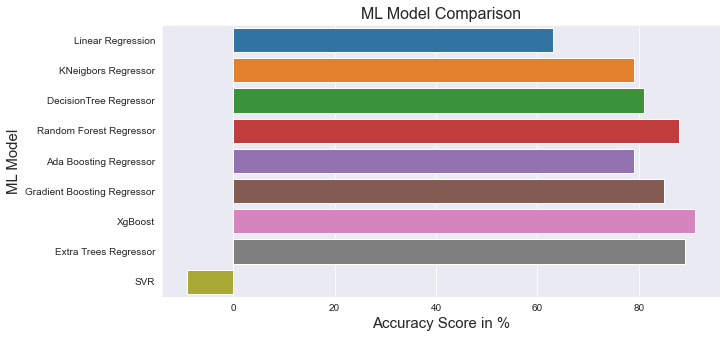

In [247]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'ML_Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that Gradient Boost(63.56%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so lets consider the difference Between Accuracy_Score and Cross_Validation_Score....

# Step 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

Lets sort by the column; Accuracy_VS_CVScore to have a good view of the differential between Accuracy_Score and CVScore

In [248]:
#Sorting....
models.sort_values(by = 'Accuracy_VS_CVScore', ascending = True)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
8,SVR,-9.0,-13.0,0.045372,176.396371,133472.517171,365.338907
5,Gradient Boosting Regressor,85.0,74.0,0.113296,119.902382,35551.404668,188.550801
7,Extra Trees Regressor,89.0,78.0,0.117774,72.358598,16653.830841,129.049722
3,Random Forest Regressor,88.0,75.0,0.120968,83.377050,20816.392917,144.278872
0,Linear Regression,63.0,48.0,0.156181,190.076555,66364.993188,257.614039
2,DecisionTree Regressor,81.0,61.0,0.204406,85.246310,29089.465805,170.556342
4,Ada Boosting Regressor,79.0,57.0,0.213664,153.952327,44053.757661,209.889870
6,XgBoost,91.0,68.0,0.232570,77.780824,17093.251606,130.741163
1,KNeigbors Regressor,79.0,-13.0,0.920775,94.229428,31052.194106,176.216328


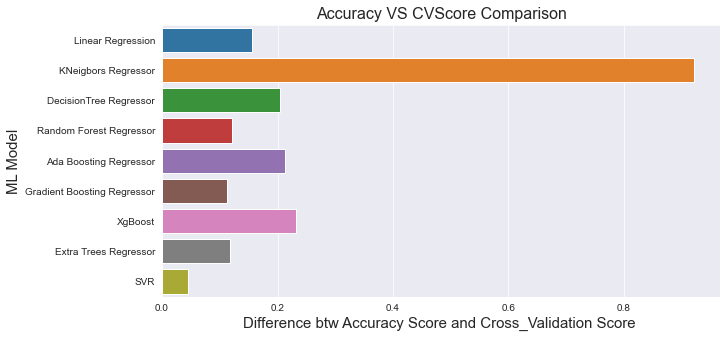

In [249]:
#A more clearer visualization.....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'ML_Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is STILL ExtraTrees Regressor!

# Step 6.2 - Conclusion on Best Choice of Model

From the above we can see:
 - The Model with least difference between Accuracy Score(r2 score) and Cross Validation Score is EXTRATREES REGRESSOR!
 
 - It has the lowest Root Mean Square Error(RMSE): 0.4

# Hence Optimum Machine Model Chosen = EXTRATREES REGRESSION MODEL!

# Step 7 - HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [250]:
ex=ExtraTreesRegressor()

In [251]:
param_grid = {'n_estimators': [10,50,100],'criterion': ['mse', 'mae'],'max_depth': [2,8,16,32,50],'max_features': ['auto','sqrt','log2'],'bootstrap': [True, False],'warm_start': [True, False]}

In [252]:
#Gridsearch
gridsearch = GridSearchCV(ex, param_grid, cv=5, scoring='accuracy')
gridsearch.fit(x_train, y_train);

In [253]:
#Get best hyperparameters
gridsearch.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 10,
 'warm_start': True}

Now lets use the best parameters.....

In [254]:
#Instantiating using the best parameters...
ex=ExtraTreesRegressor(criterion='mse',max_depth=2,max_features='auto',n_estimators=10,warm_start=True)

In [255]:
#Instantiating using the best parameters...
ex=ExtraTreesRegressor(criterion='squared_error',max_depth=500,max_features='auto',n_estimators=500,min_samples_leaf=1,random_state=174,verbose=5,max_samples=100,ccp_alpha=0.0,bootstrap=True)

In [256]:
#fitting the model...
ex.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.8s finished


ExtraTreesRegressor(bootstrap=True, max_depth=500, max_features='auto',
                    max_samples=100, n_estimators=500, random_state=174,
                    verbose=5)

In [259]:
pred_test=ex.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


In [260]:
metrics.r2_score(y_test,pred_test)

0.8047624906342815

From the above we can see:
- Final Accuracy is 80.47% and RMSE is 0.007
- That the ExtraTreeRegressor has a low RMSE

HENCE WE CAN CONCLUDE OUR MODEL IS GOOD!!

# Step 8 - MODEL SAVING

In [261]:
filename='Machine_Model_Project_global'
pickle.dump(ex,open(filename,'wb'))